In [1]:
import sys
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar
import warnings
warnings.filterwarnings('ignore')

project_root = Path.cwd().parent 
sys.path.append(str(project_root))
csv_path = Path.cwd().parent / 'dataset' / 'sales.csv'

df = pd.read_csv(csv_path)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")




Dataset loaded successfully!
Shape: (9800, 18)


In [2]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Quarter'] = df['Order Date'].dt.quarter
df['Month_Year'] = df['Order Date'].dt.to_period('M')

print("=== SALES PERFORMANCE ANALYSIS ===\n")

print("1. TOP-PERFORMING MARKETS")
print("-" * 40)

print("Total Sales by Region:")
region_sales = df.groupby('Region')['Sales'].agg(['sum', 'count', 'mean']).round(2)
region_sales.columns = ['Total Sales', 'Orders', 'Avg Order Value']
region_sales = region_sales.sort_values('Total Sales', ascending=False)
print(region_sales)
print()

print("Top 10 States by Total Sales:")
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
print(state_sales.round(2))
print()

print("Top 10 Cities by Total Sales:")
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
print(city_sales.round(2))
print()

print("2. SALES TRENDS OVER TIME")
print("-" * 40)

monthly_sales = df.groupby('Month_Year')['Sales'].sum()
print("Monthly Sales Trends (First 12 months):")
print(monthly_sales.head(12).round(2))
print()

seasonal_sales = df.groupby('Month')['Sales'].sum().round(2)
print("Sales by Month (Seasonal Patterns):")
for month, sales in seasonal_sales.items():
    month_name = pd.to_datetime(f'2017-{month:02d}-01').strftime('%B')
    print(f"{month_name}: ${sales:,.2f}")
print()

print("3. AVERAGE ORDER VALUE & SALES DISTRIBUTION")
print("-" * 50)

overall_stats = df['Sales'].describe()
print("Sales Distribution Statistics:")
print(f"Total Sales: ${df['Sales'].sum():,.2f}")
print(f"Average Order Value: ${df['Sales'].mean():.2f}")
print(f"Median Order Value: ${df['Sales'].median():.2f}")
print(f"Standard Deviation: ${df['Sales'].std():.2f}")
print(f"Min Order Value: ${df['Sales'].min():.2f}")
print(f"Max Order Value: ${df['Sales'].max():.2f}")
print()

print("Sales Distribution by Quartiles:")
quartiles = df['Sales'].quantile([0.25, 0.5, 0.75, 0.9, 0.95]).round(2)
print(f"25th Percentile: ${quartiles[0.25]:.2f}")
print(f"50th Percentile (Median): ${quartiles[0.5]:.2f}")
print(f"75th Percentile: ${quartiles[0.75]:.2f}")
print(f"90th Percentile: ${quartiles[0.9]:.2f}")
print(f"95th Percentile: ${quartiles[0.95]:.2f}")
print()

print("4. TEMPORAL COMPARISONS")
print("-" * 30)

yearly_sales = df.groupby('Year')['Sales'].agg(['sum', 'count', 'mean']).round(2)
yearly_sales.columns = ['Total Sales', 'Orders', 'Avg Order Value']
print("Yearly Sales Comparison:")
print(yearly_sales)
print()

quarterly_sales = df.groupby(['Year', 'Quarter'])['Sales'].sum().round(2)
print("Quarterly Sales by Year:")
print(quarterly_sales)
print()

monthly_avg = df.groupby('Month')['Sales'].mean().round(2)
print("Average Monthly Sales (Across All Years):")
for month, avg_sales in monthly_avg.items():
    month_name = pd.to_datetime(f'2017-{month:02d}-01').strftime('%B')
    print(f"{month_name}: ${avg_sales:.2f}")
print()

if len(df['Year'].unique()) > 1:
    print("Year-over-Year Growth Analysis:")
    years = sorted(df['Year'].unique())
    for i in range(1, len(years)):
        prev_year = years[i-1]
        curr_year = years[i]
        prev_sales = df[df['Year'] == prev_year]['Sales'].sum()
        curr_sales = df[df['Year'] == curr_year]['Sales'].sum()
        growth_rate = ((curr_sales - prev_sales) / prev_sales) * 100
        print(f"{prev_year} to {curr_year}: {growth_rate:.1f}% growth")

print("\n5. REGIONAL PERFORMANCE RANKING")
print("-" * 35)
region_performance = df.groupby('Region').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Customer ID': 'nunique'
}).round(2)

region_performance.columns = ['Total_Sales', 'Avg_Order_Value', 'Total_Orders', 'Unique_Customers']
region_performance['Sales_per_Customer'] = (region_performance['Total_Sales'] / region_performance['Unique_Customers']).round(2)
region_performance = region_performance.sort_values('Total_Sales', ascending=False)

print("Regional Performance Summary:")
print(region_performance)

=== SALES PERFORMANCE ANALYSIS ===

1. TOP-PERFORMING MARKETS
----------------------------------------
Total Sales by Region:
         Total Sales  Orders  Avg Order Value
Region                                       
West       710219.68    3140           226.18
East       669518.73    2785           240.40
Central    492646.91    2277           216.36
South      389151.46    1598           243.52

Top 10 States by Total Sales:
State
California      446306.46
New York        306361.15
Texas           168572.53
Washington      135206.85
Pennsylvania    116276.65
Florida          88436.53
Illinois         79236.52
Michigan         76136.07
Ohio             75130.35
Virginia         70636.72
Name: Sales, dtype: float64

Top 10 Cities by Total Sales:
City
New York City    252462.55
Los Angeles      173420.18
Seattle          116106.32
San Francisco    109041.12
Philadelphia     108841.75
Houston           63956.14
Chicago           47820.13
San Diego         47521.03
Jacksonville      447

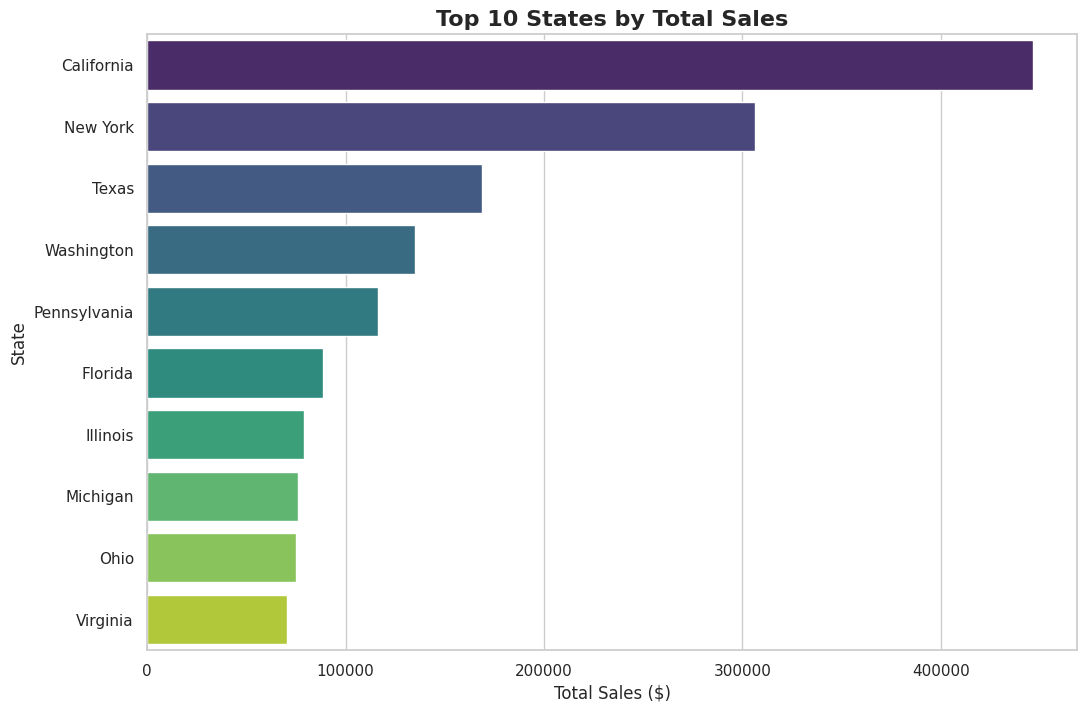

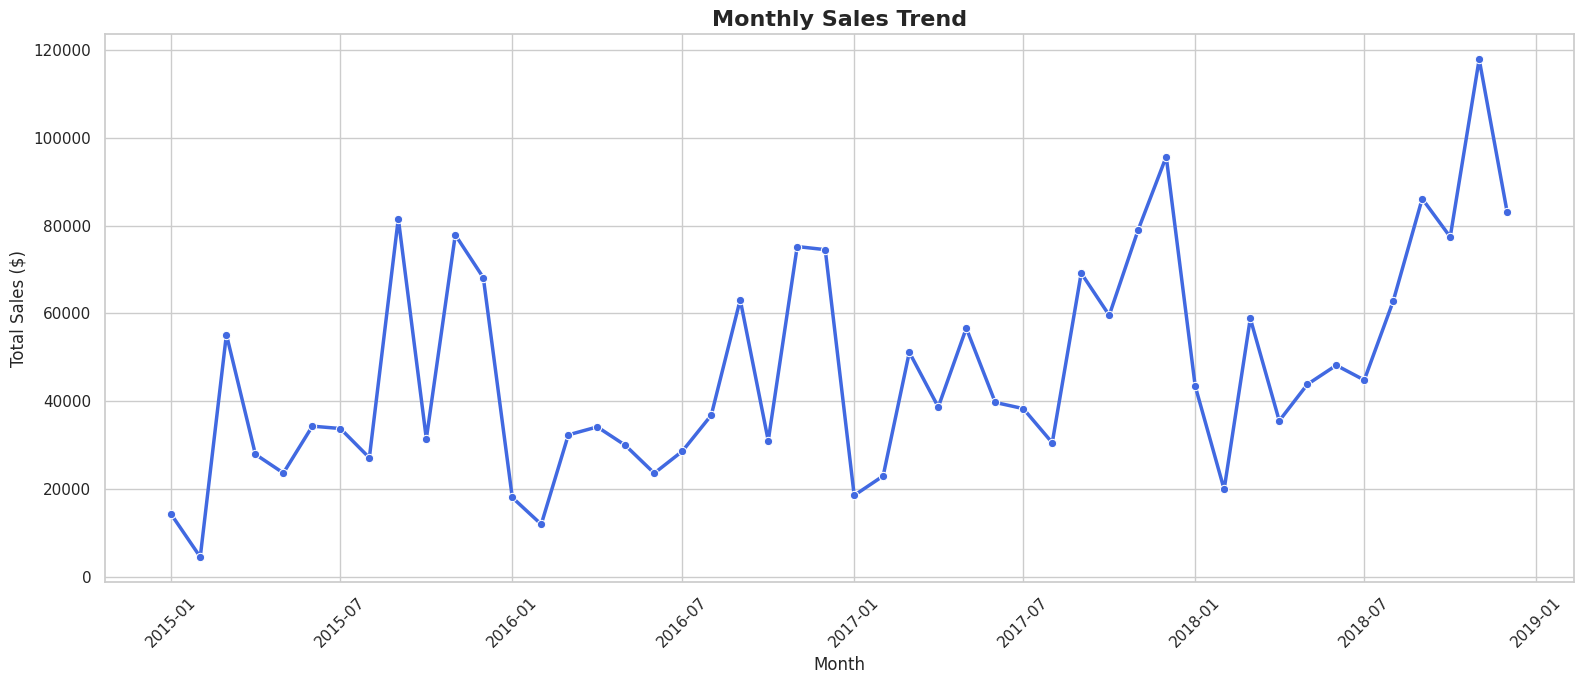

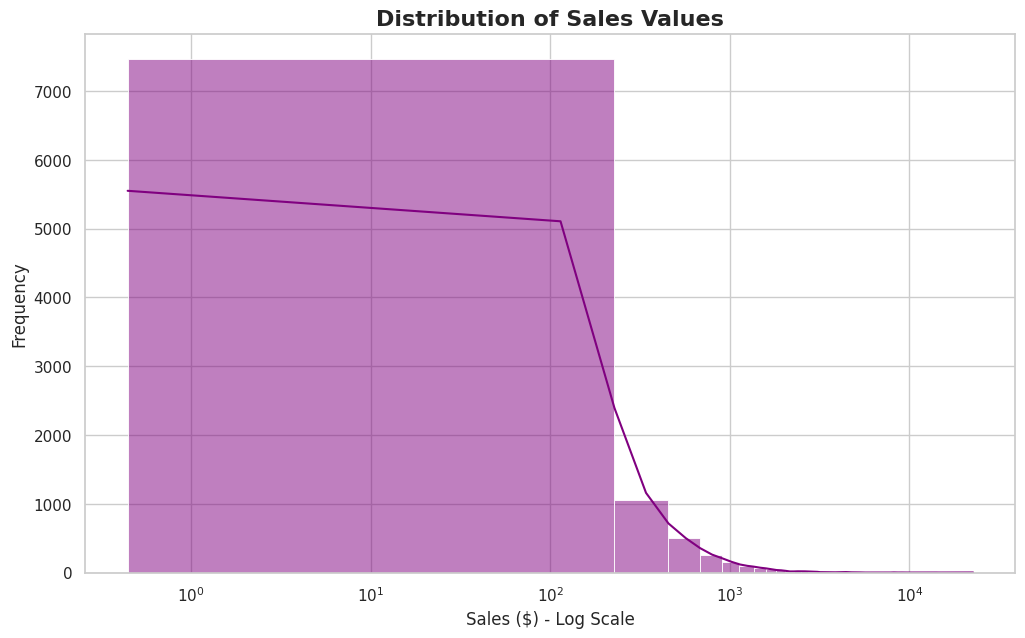

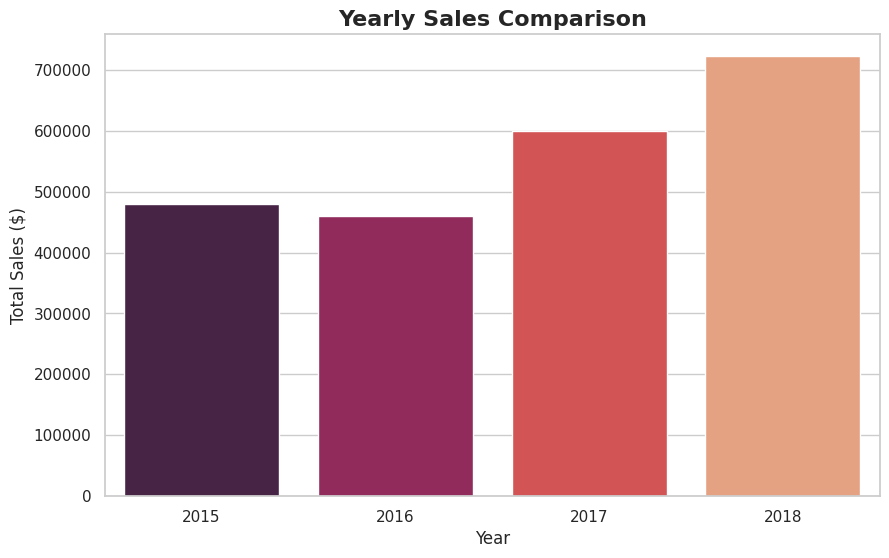

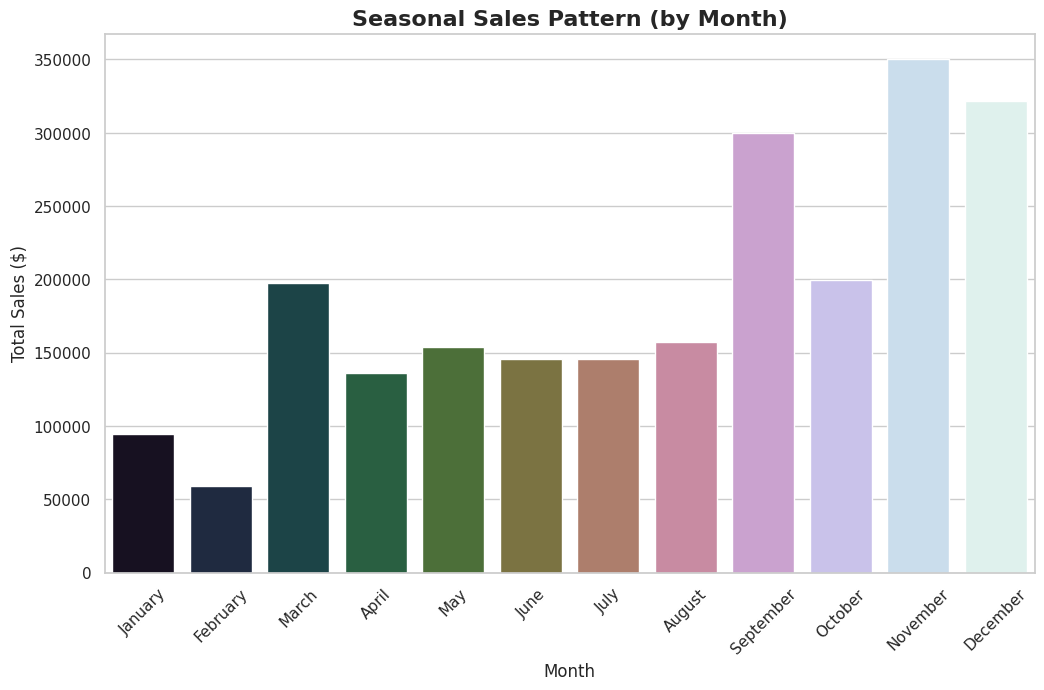

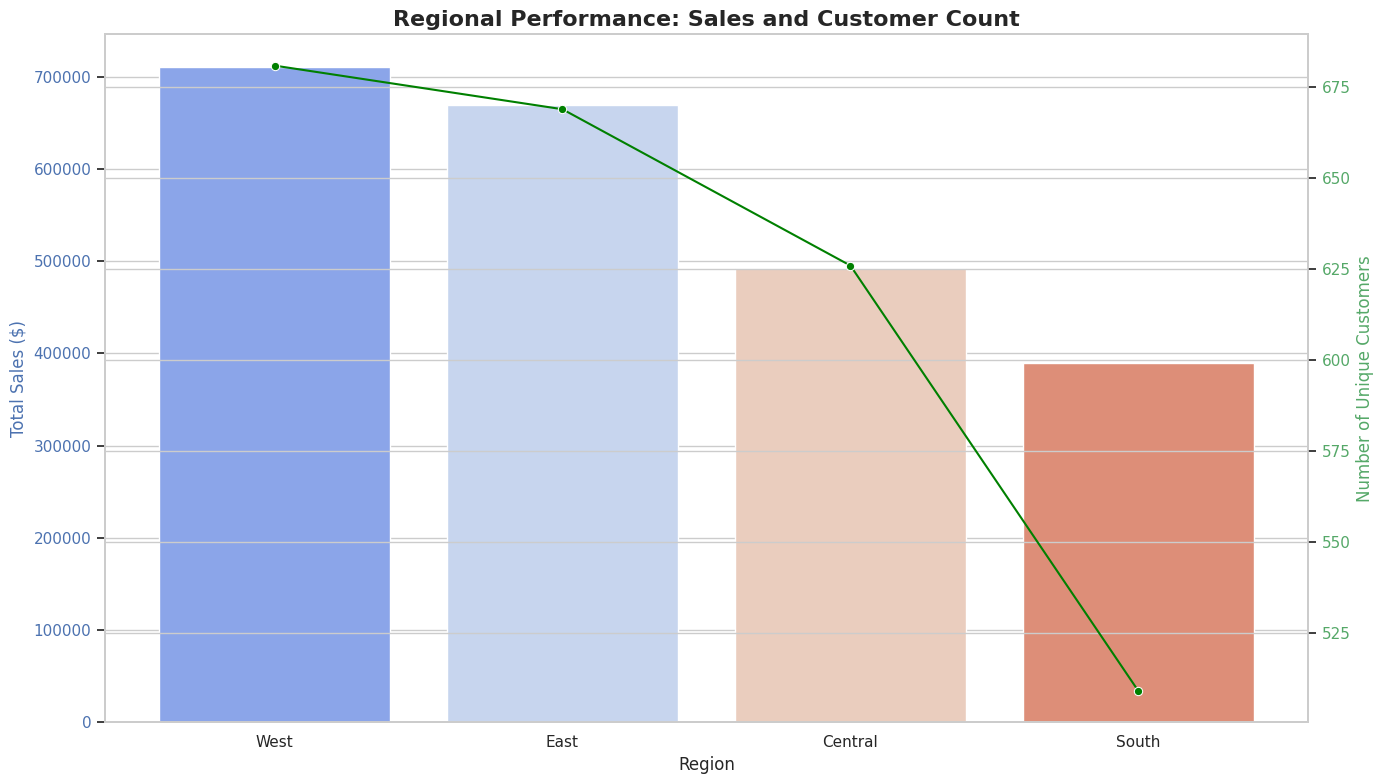

In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Quarter'] = df['Order Date'].dt.quarter
df['Month_Year'] = df['Order Date'].dt.to_period('M')

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 8))
state_sales = df.groupby('State')['Sales'].sum().nlargest(10)
sns.barplot(x=state_sales.values, y=state_sales.index, palette="viridis", orient='h')
plt.title('Top 10 States by Total Sales', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.show()

plt.figure(figsize=(16, 7))
monthly_sales = df.groupby('Month_Year')['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='royalblue', linewidth=2.5)
plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 7))
sns.histplot(df['Sales'], bins=100, kde=True, color='purple')
plt.title('Distribution of Sales Values', fontsize=16, fontweight='bold')
plt.xlabel('Sales ($) - Log Scale', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xscale('log')
plt.show()

plt.figure(figsize=(10, 6))
yearly_sales = df.groupby('Year')['Sales'].sum()
sns.barplot(x=yearly_sales.index.astype(str), y=yearly_sales.values, palette="rocket")
plt.title('Yearly Sales Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.show()

plt.figure(figsize=(12, 7))
seasonal_sales = df.groupby('Month')['Sales'].sum()
seasonal_sales.index = [calendar.month_name[i] for i in seasonal_sales.index]
sns.barplot(x=seasonal_sales.index, y=seasonal_sales.values, palette="cubehelix")
plt.title('Seasonal Sales Pattern (by Month)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

region_performance = df.groupby('Region').agg(
    Total_Sales=('Sales', 'sum'),
    Unique_Customers=('Customer ID', 'nunique')
).reset_index().sort_values('Total_Sales', ascending=False)

fig, ax1 = plt.subplots(figsize=(14, 8))

sns.barplot(x='Region', y='Total_Sales', data=region_performance, palette='coolwarm', ax=ax1)
ax1.set_xlabel('Region', fontsize=12)
ax1.set_ylabel('Total Sales ($)', fontsize=12, color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
sns.lineplot(x='Region', y='Unique_Customers', data=region_performance, ax=ax2, color='green', marker='o', sort=False)
ax2.set_ylabel('Number of Unique Customers', fontsize=12, color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Regional Performance: Sales and Customer Count', fontsize=16, fontweight='bold')
fig.tight_layout()
plt.show()


In [5]:

print("=== CUSTOMER ANALYSIS ===\n")

print("1. CUSTOMER SEGMENTATION ANALYSIS")
print("-" * 40)

segment_stats = df.groupby('Segment').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Customer ID': 'nunique'
}).round(2)

segment_stats.columns = ['Total_Sales', 'Avg_Order_Value', 'Total_Orders', 'Unique_Customers']
segment_stats['Avg_Orders_per_Customer'] = (segment_stats['Total_Orders'] / segment_stats['Unique_Customers']).round(2)
segment_stats['Sales_per_Customer'] = (segment_stats['Total_Sales'] / segment_stats['Unique_Customers']).round(2)

segment_stats['Sales_Percentage'] = ((segment_stats['Total_Sales'] / segment_stats['Total_Sales'].sum()) * 100).round(1)
segment_stats['Customer_Percentage'] = ((segment_stats['Unique_Customers'] / segment_stats['Unique_Customers'].sum()) * 100).round(1)

print("Customer Segment Performance:")
print(segment_stats)
print()

print("Segment Ranking by Key Metrics:")
print("By Total Sales:")
print(segment_stats.sort_values('Total_Sales', ascending=False)['Total_Sales'])
print("\nBy Sales per Customer:")
print(segment_stats.sort_values('Sales_per_Customer', ascending=False)['Sales_per_Customer'])
print("\nBy Average Order Value:")
print(segment_stats.sort_values('Avg_Order_Value', ascending=False)['Avg_Order_Value'])
print()

print("2. TOP CUSTOMERS BY SALES VOLUME")
print("-" * 40)

top_customers = df.groupby(['Customer ID', 'Customer Name']).agg({
    'Sales': ['sum', 'count', 'mean'],
    'Order Date': ['min', 'max']
}).round(2)

top_customers.columns = ['Total_Sales', 'Total_Orders', 'Avg_Order_Value', 'First_Order', 'Last_Order']
top_customers['Customer_Lifetime_Days'] = (top_customers['Last_Order'] - top_customers['First_Order']).dt.days
top_customers = top_customers.sort_values('Total_Sales', ascending=False)

print("Top 20 Customers by Total Sales:")
print(top_customers.head(20)[['Total_Sales', 'Total_Orders', 'Avg_Order_Value']])
print()

print("Customer Value Distribution:")
customer_sales = df.groupby('Customer ID')['Sales'].sum()
print(f"Total Customers: {len(customer_sales)}")
print(f"Average Customer Value: ${customer_sales.mean():.2f}")
print(f"Median Customer Value: ${customer_sales.median():.2f}")
print(f"Top 10% customers contribute: ${customer_sales.quantile(0.9):.2f}+ each")
print(f"Top 5% customers contribute: ${customer_sales.quantile(0.95):.2f}+ each")
print(f"Top 1% customers contribute: ${customer_sales.quantile(0.99):.2f}+ each")
print()

print("3. CUSTOMER GEOGRAPHIC DISTRIBUTION")
print("-" * 45)

customer_geo = df.groupby(['Region', 'Segment']).agg({
    'Customer ID': 'nunique',
    'Sales': 'sum'
}).round(2)

print("Customers by Region and Segment:")
customer_by_region = df.groupby('Region')['Customer ID'].nunique().sort_values(ascending=False)
print("Total Customers by Region:")
print(customer_by_region)
print()

print("Customer Segment Distribution by Region:")
region_segment = pd.crosstab(df['Region'], df['Segment'], normalize='index') * 100
print(region_segment.round(1))
print()

print("Top 10 States by Customer Count:")
customers_by_state = df.groupby('State')['Customer ID'].nunique().sort_values(ascending=False).head(10)
print(customers_by_state)
print()

print("Top 10 Cities by Customer Count:")
customers_by_city = df.groupby('City')['Customer ID'].nunique().sort_values(ascending=False).head(10)
print(customers_by_city)
print()

print("Average Sales per Customer by Region and Segment:")
regional_prefs = df.groupby(['Region', 'Segment']).agg({
    'Sales': 'sum',
    'Customer ID': 'nunique'
})
regional_prefs['Sales_per_Customer'] = (regional_prefs['Sales'] / regional_prefs['Customer ID']).round(2)
print(regional_prefs['Sales_per_Customer'].unstack(fill_value=0))
print()

print("4. REPEAT CUSTOMER & PURCHASE FREQUENCY ANALYSIS")
print("-" * 55)

purchase_frequency = df.groupby('Customer ID').agg({
    'Order ID': 'count',
    'Sales': 'sum',
    'Order Date': ['min', 'max']
}).round(2)

purchase_frequency.columns = ['Order_Count', 'Total_Sales', 'First_Order', 'Last_Order']
purchase_frequency['Days_Active'] = (purchase_frequency['Last_Order'] - purchase_frequency['First_Order']).dt.days
purchase_frequency['Avg_Days_Between_Orders'] = (purchase_frequency['Days_Active'] / 
                                                (purchase_frequency['Order_Count'] - 1)).round(1)

purchase_frequency['Avg_Days_Between_Orders'].replace([np.inf, -np.inf], 0, inplace=True)

print("Purchase Frequency Distribution:")
frequency_dist = purchase_frequency['Order_Count'].value_counts().sort_index()
print("Orders per Customer:")
for orders, count in frequency_dist.head(10).items():
    percentage = (count / len(purchase_frequency)) * 100
    print(f"{orders} orders: {count} customers ({percentage:.1f}%)")
print()

one_time_customers = len(purchase_frequency[purchase_frequency['Order_Count'] == 1])
repeat_customers = len(purchase_frequency[purchase_frequency['Order_Count'] > 1])
total_customers = len(purchase_frequency)

print("Customer Loyalty Analysis:")
print(f"One-time customers: {one_time_customers} ({(one_time_customers/total_customers)*100:.1f}%)")
print(f"Repeat customers: {repeat_customers} ({(repeat_customers/total_customers)*100:.1f}%)")
print()

repeat_customer_stats = purchase_frequency[purchase_frequency['Order_Count'] > 1]
print("Repeat Customer Statistics:")
print(f"Average orders per repeat customer: {repeat_customer_stats['Order_Count'].mean():.1f}")
print(f"Average total sales per repeat customer: ${repeat_customer_stats['Total_Sales'].mean():.2f}")
print(f"Average days between orders: {repeat_customer_stats['Avg_Days_Between_Orders'].mean():.0f} days")
print()

print("Top 10 Repeat Customers (by order frequency):")
top_repeat = repeat_customer_stats.sort_values('Order_Count', ascending=False).head(10)
print(top_repeat[['Order_Count', 'Total_Sales', 'Avg_Days_Between_Orders']])
print()

print("Customer Lifetime Value Segments:")
purchase_frequency['CLV_Segment'] = pd.cut(purchase_frequency['Total_Sales'], 
                                          bins=[0, 100, 500, 1000, 5000, float('inf')],
                                          labels=['Low ($0-100)', 'Medium ($100-500)', 
                                                'High ($500-1000)', 'Premium ($1000-5000)', 
                                                'VIP ($5000+)'])

clv_segments = purchase_frequency['CLV_Segment'].value_counts()
print("Customer distribution by lifetime value:")
for segment, count in clv_segments.items():
    percentage = (count / len(purchase_frequency)) * 100
    print(f"{segment}: {count} customers ({percentage:.1f}%)")
print()

print("Repeat Customer Rate by Segment:")
for segment in df['Segment'].unique():
    segment_customers = df[df['Segment'] == segment]['Customer ID'].unique()
    segment_freq = purchase_frequency[purchase_frequency.index.isin(segment_customers)]
    repeat_rate = len(segment_freq[segment_freq['Order_Count'] > 1]) / len(segment_freq) * 100
    avg_orders = segment_freq['Order_Count'].mean()
    print(f"{segment}: {repeat_rate:.1f}% repeat rate, {avg_orders:.1f} avg orders per customer")

=== CUSTOMER ANALYSIS ===

1. CUSTOMER SEGMENTATION ANALYSIS
----------------------------------------
Customer Segment Performance:
             Total_Sales  Avg_Order_Value  Total_Orders  Unique_Customers  \
Segment                                                                     
Consumer      1148060.53           225.07          5101               409   
Corporate      688494.07           233.15          2953               236   
Home Office    424982.18           243.40          1746               148   

             Avg_Orders_per_Customer  Sales_per_Customer  Sales_Percentage  \
Segment                                                                      
Consumer                       12.47             2806.99              50.8   
Corporate                      12.51             2917.35              30.4   
Home Office                    11.80             2871.50              18.8   

             Customer_Percentage  
Segment                           
Consumer             

=== CUSTOMER ANALYSIS ===

1. CUSTOMER SEGMENTATION ANALYSIS
----------------------------------------
Customer Segment Performance:
             Total_Sales  Avg_Order_Value  Total_Orders  Unique_Customers  \
Segment                                                                     
Consumer      1148060.53           225.07          5101               409   
Corporate      688494.07           233.15          2953               236   
Home Office    424982.18           243.40          1746               148   

             Sales_per_Customer  
Segment                          
Consumer                2806.99  
Corporate               2917.35  
Home Office             2871.50  



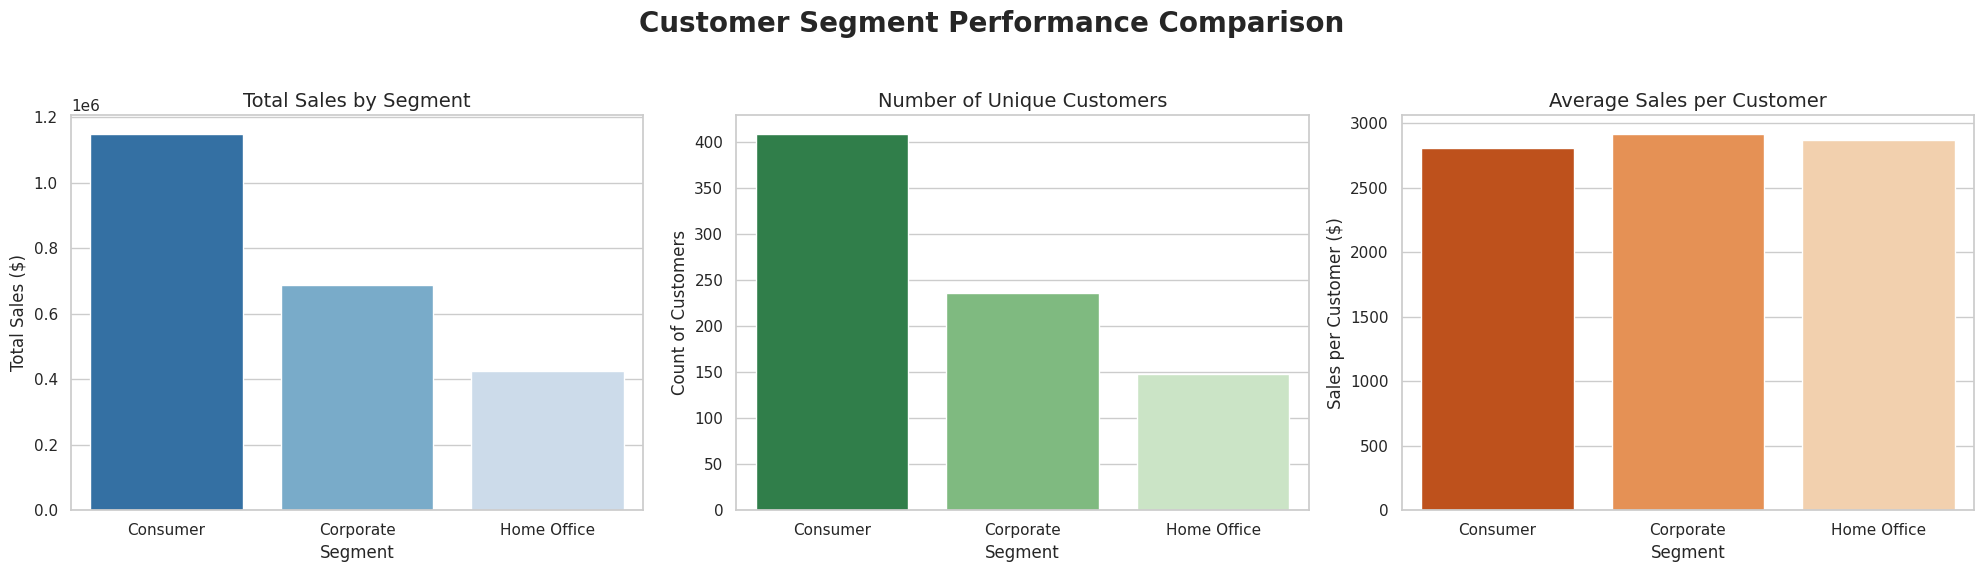


2. TOP CUSTOMERS BY SALES VOLUME
----------------------------------------
Top 20 Customers by Total Sales:
                                Total_Sales
Customer ID Customer Name                  
SM-20320    Sean Miller           25043.050
TC-20980    Tamara Chand          19052.218
RB-19360    Raymond Buch          15117.339
TA-21385    Tom Ashbrook          14595.620
AB-10105    Adrian Barton         14473.571
KL-16645    Ken Lonsdale          14175.229
SC-20095    Sanjit Chand          14142.334
HL-15040    Hunter Lopez          12873.298
SE-20110    Sanjit Engle          12209.438
CC-12370    Christopher Conant    12129.072
TS-21370    Todd Sumrall          11891.751
GT-14710    Greg Tran             11820.120
BM-11140    Becky Martin          11789.630
SV-20365    Seth Vernon           11470.950
CJ-12010    Caroline Jumper       11164.974
CL-12565    Clay Ludtke           10880.546
ME-17320    Maria Etezadi         10663.728
KF-16285    Karen Ferguson        10604.266
BS-11365    

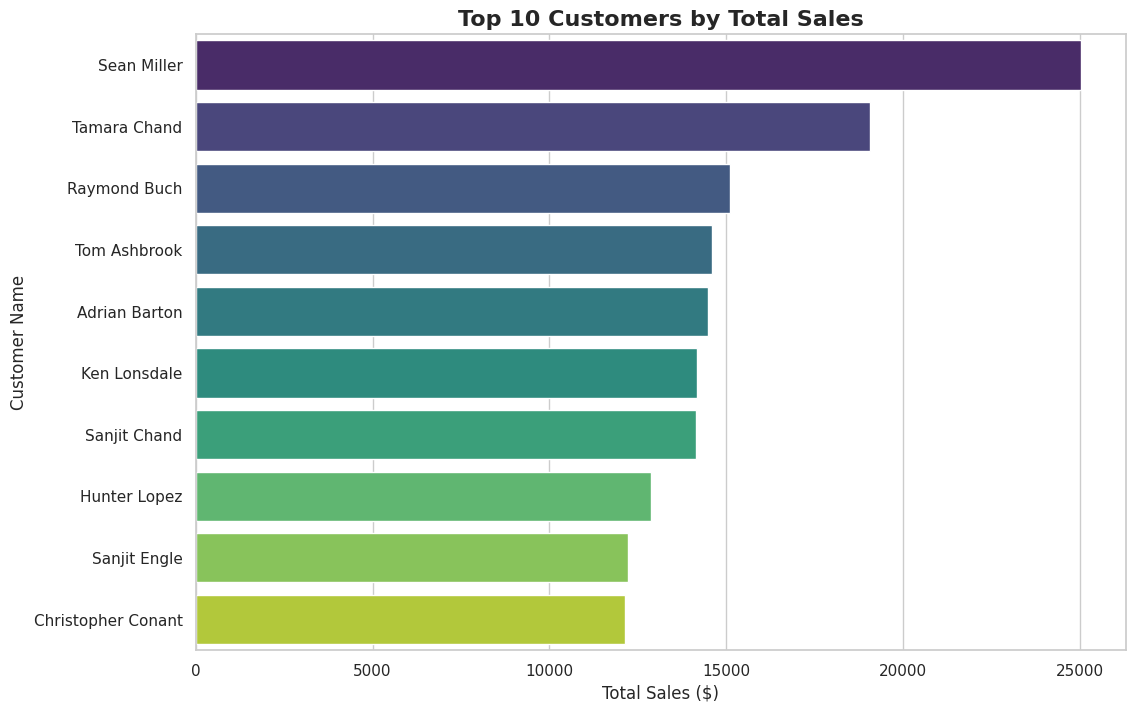

Customer Value Distribution:
Total Customers: 793
Average Customer Value: $2851.87
Median Customer Value: $2215.00
Top 10% customers contribute: $5964.87+ each
Top 1% customers contribute: $12262.55+ each



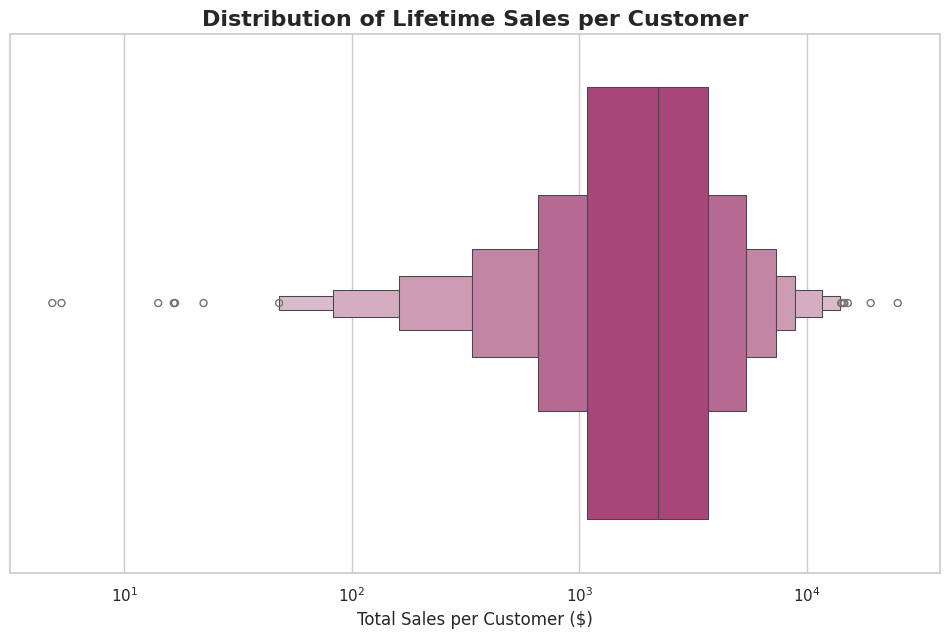


3. CUSTOMER GEOGRAPHIC DISTRIBUTION
---------------------------------------------
Total Customers by Region:
Region
West       681
East       669
Central    626
South      509
Name: Customer ID, dtype: int64

Customer Segment Distribution by Region (Crosstab):
Segment  Consumer  Corporate  Home Office
Region                                   
Central      1188        661          428
East         1444        850          491
South         831        500          267
West         1638        942          560



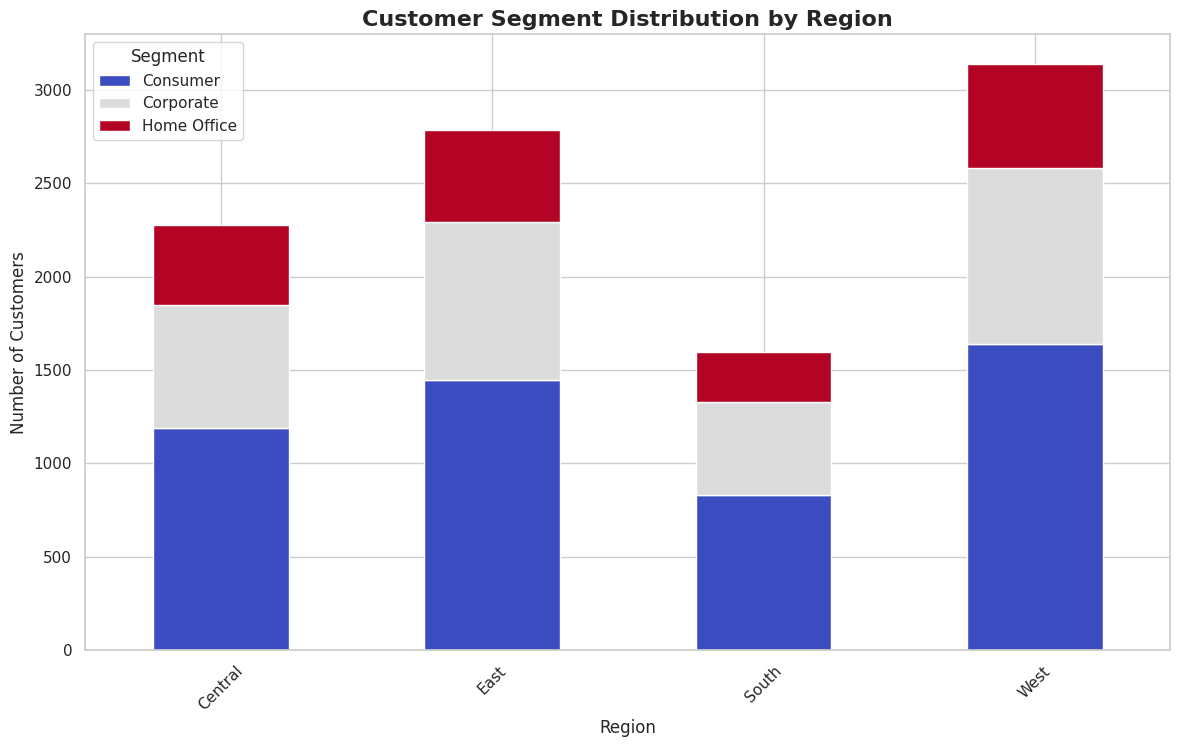


4. REPEAT CUSTOMER & PURCHASE FREQUENCY ANALYSIS
-------------------------------------------------------
Customer Loyalty Analysis:
One-time customers: 6 (0.8%)
Repeat customers: 787 (99.2%)



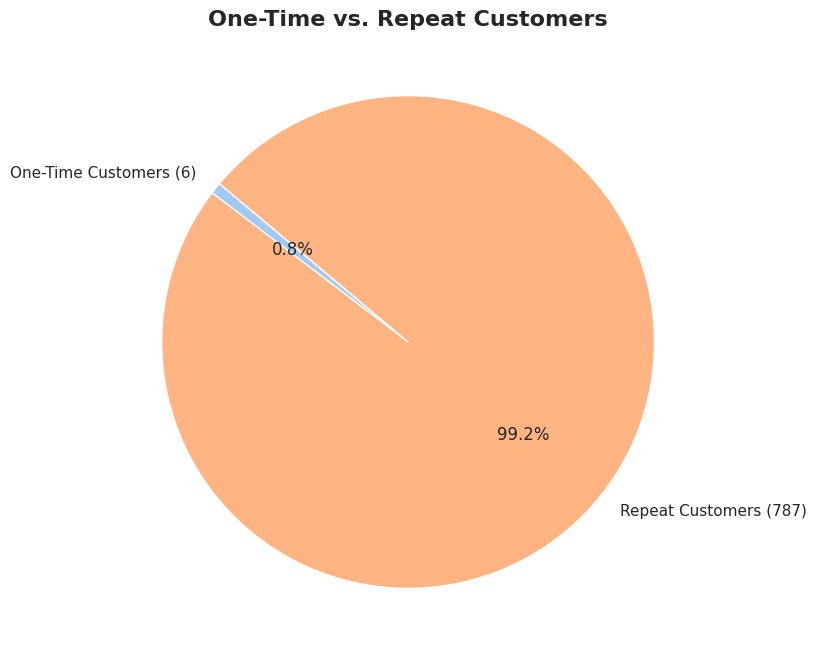

Customer distribution by lifetime value:
Sales
Low ($0-500)          75
Medium ($500-2k)     284
High ($2k-5k)        320
Premium ($5k-10k)     95
VIP ($10k+)           19
Name: count, dtype: int64



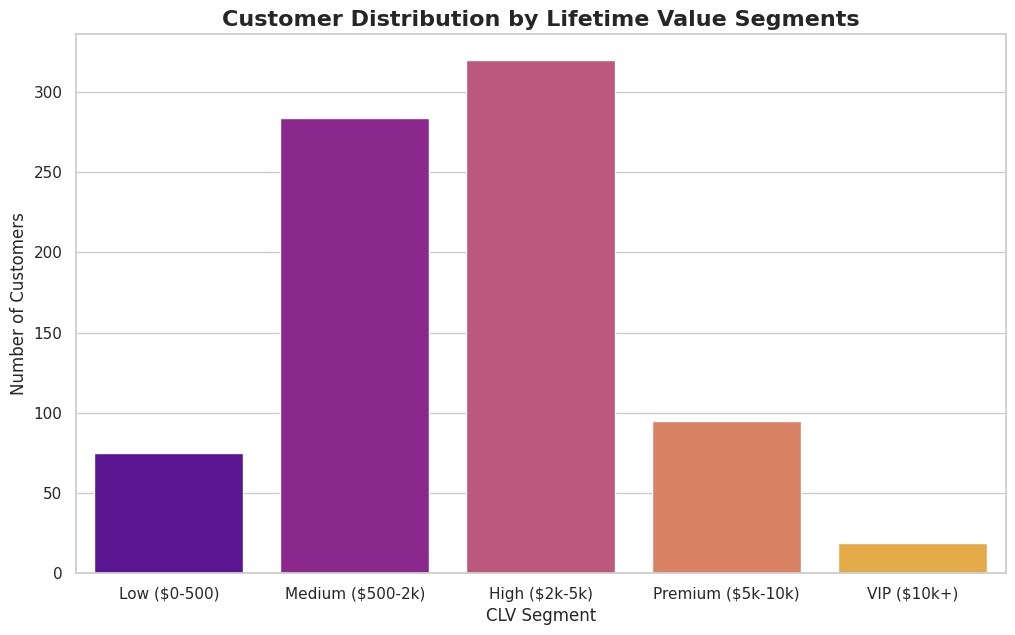

In [6]:
sns.set_theme(style="whitegrid")

print("=== CUSTOMER ANALYSIS ===\n")

print("1. CUSTOMER SEGMENTATION ANALYSIS")
print("-" * 40)

segment_stats = df.groupby('Segment').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Customer ID': 'nunique'
}).round(2)
segment_stats.columns = ['Total_Sales', 'Avg_Order_Value', 'Total_Orders', 'Unique_Customers']
segment_stats['Sales_per_Customer'] = (segment_stats['Total_Sales'] / segment_stats['Unique_Customers']).round(2)
segment_stats = segment_stats.sort_values('Total_Sales', ascending=False)

print("Customer Segment Performance:")
print(segment_stats)
print()

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Customer Segment Performance Comparison', fontsize=20, fontweight='bold')

sns.barplot(x=segment_stats.index, y=segment_stats['Total_Sales'], ax=axes[0], palette='Blues_r')
axes[0].set_title('Total Sales by Segment', fontsize=14)
axes[0].set_ylabel('Total Sales ($)')

sns.barplot(x=segment_stats.index, y=segment_stats['Unique_Customers'], ax=axes[1], palette='Greens_r')
axes[1].set_title('Number of Unique Customers', fontsize=14)
axes[1].set_ylabel('Count of Customers')

sns.barplot(x=segment_stats.index, y=segment_stats['Sales_per_Customer'], ax=axes[2], palette='Oranges_r')
axes[2].set_title('Average Sales per Customer', fontsize=14)
axes[2].set_ylabel('Sales per Customer ($)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\n2. TOP CUSTOMERS BY SALES VOLUME")
print("-" * 40)

top_customers = df.groupby(['Customer ID', 'Customer Name']).agg(
    Total_Sales=('Sales', 'sum')
).sort_values('Total_Sales', ascending=False).head(20)

print("Top 20 Customers by Total Sales:")
print(top_customers)
print()

plt.figure(figsize=(12, 8))
sns.barplot(x=top_customers.head(10)['Total_Sales'], y=top_customers.head(10).index.get_level_values('Customer Name'), palette='viridis', orient='h')
plt.title('Top 10 Customers by Total Sales', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Customer Name', fontsize=12)
plt.show()


customer_sales = df.groupby('Customer ID')['Sales'].sum()
print("Customer Value Distribution:")
print(f"Total Customers: {len(customer_sales)}")
print(f"Average Customer Value: ${customer_sales.mean():.2f}")
print(f"Median Customer Value: ${customer_sales.median():.2f}")
print(f"Top 10% customers contribute: ${customer_sales.quantile(0.9):.2f}+ each")
print(f"Top 1% customers contribute: ${customer_sales.quantile(0.99):.2f}+ each")
print()

plt.figure(figsize=(12, 7))
sns.boxenplot(x=customer_sales, palette='magma')
plt.title('Distribution of Lifetime Sales per Customer', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales per Customer ($)', fontsize=12)
plt.xscale('log')
plt.show()

print("\n3. CUSTOMER GEOGRAPHIC DISTRIBUTION")
print("-" * 45)

customer_by_region = df.groupby('Region')['Customer ID'].nunique().sort_values(ascending=False)
print("Total Customers by Region:")
print(customer_by_region)
print()

region_segment_crosstab = pd.crosstab(df['Region'], df['Segment'])
print("Customer Segment Distribution by Region (Crosstab):")
print(region_segment_crosstab)
print()


region_segment_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='coolwarm')
plt.title('Customer Segment Distribution by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.show()


print("\n4. REPEAT CUSTOMER & PURCHASE FREQUENCY ANALYSIS")
print("-" * 55)

purchase_frequency = df.groupby('Customer ID')['Order ID'].count().reset_index()
purchase_frequency.columns = ['Customer ID', 'Order_Count']

one_time_customers = purchase_frequency[purchase_frequency['Order_Count'] == 1].shape[0]
repeat_customers = purchase_frequency[purchase_frequency['Order_Count'] > 1].shape[0]
total_customers = purchase_frequency.shape[0]

print("Customer Loyalty Analysis:")
print(f"One-time customers: {one_time_customers} ({(one_time_customers/total_customers)*100:.1f}%)")
print(f"Repeat customers: {repeat_customers} ({(repeat_customers/total_customers)*100:.1f}%)")
print()

plt.figure(figsize=(8, 8))
loyalty_data = [one_time_customers, repeat_customers]
labels = [f'One-Time Customers ({one_time_customers})', f'Repeat Customers ({repeat_customers})']
plt.pie(loyalty_data, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('One-Time vs. Repeat Customers', fontsize=16, fontweight='bold')
plt.show()

customer_sales_clv = df.groupby('Customer ID')['Sales'].sum()
clv_bins = [0, 500, 2000, 5000, 10000, float('inf')]
clv_labels = ['Low ($0-500)', 'Medium ($500-2k)', 'High ($2k-5k)', 'Premium ($5k-10k)', 'VIP ($10k+)']
clv_segments = pd.cut(customer_sales_clv, bins=clv_bins, labels=clv_labels, right=False)
clv_distribution = clv_segments.value_counts().sort_index()

print("Customer distribution by lifetime value:")
print(clv_distribution)
print()

plt.figure(figsize=(12, 7))
sns.barplot(x=clv_distribution.index, y=clv_distribution.values, palette='plasma')
plt.title('Customer Distribution by Lifetime Value Segments', fontsize=16, fontweight='bold')
plt.xlabel('CLV Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()


In [7]:

print("=== PRODUCT ANALYSIS ===\n")

print("1. BEST-SELLING CATEGORIES & SUB-CATEGORIES")
print("-" * 50)

category_stats = df.groupby('Category').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Product ID': 'nunique'
}).round(2)

category_stats.columns = ['Total_Sales', 'Avg_Order_Value', 'Total_Orders', 'Unique_Products']
category_stats['Sales_Percentage'] = ((category_stats['Total_Sales'] / category_stats['Total_Sales'].sum()) * 100).round(1)
category_stats['Avg_Sales_per_Product'] = (category_stats['Total_Sales'] / category_stats['Unique_Products']).round(2)
category_stats = category_stats.sort_values('Total_Sales', ascending=False)

print("Category Performance Summary:")
print(category_stats)
print()

print("Top 15 Sub-categories by Total Sales:")
subcategory_sales = df.groupby(['Category', 'Sub-Category']).agg({
    'Sales': ['sum', 'count', 'mean'],
    'Product ID': 'nunique'
}).round(2)

subcategory_sales.columns = ['Total_Sales', 'Total_Orders', 'Avg_Order_Value', 'Unique_Products']
subcategory_sales['Sales_per_Product'] = (subcategory_sales['Total_Sales'] / subcategory_sales['Unique_Products']).round(2)
subcategory_sales = subcategory_sales.sort_values('Total_Sales', ascending=False)

print(subcategory_sales.head(15)[['Total_Sales', 'Total_Orders', 'Avg_Order_Value']])
print()

print("Sub-category Market Share (Top 10):")
total_sales = df['Sales'].sum()
subcategory_share = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
for subcat, sales in subcategory_share.items():
    percentage = (sales / total_sales) * 100
    print(f"{subcat}: ${sales:,.2f} ({percentage:.1f}%)")
print()

print("2. PRODUCT PERFORMANCE RANKING")
print("-" * 35)

product_performance = df.groupby(['Product ID', 'Product Name', 'Category', 'Sub-Category']).agg({
    'Sales': ['sum', 'count', 'mean'],
    'Customer ID': 'nunique'
}).round(2)

product_performance.columns = ['Total_Sales', 'Units_Sold', 'Avg_Sale_Price', 'Unique_Customers']
product_performance['Sales_per_Customer'] = (product_performance['Total_Sales'] / product_performance['Unique_Customers']).round(2)
product_performance = product_performance.sort_values('Total_Sales', ascending=False)

print("Top 20 Products by Total Sales:")
print(product_performance.head(20)[['Total_Sales', 'Units_Sold', 'Avg_Sale_Price']])
print()

print("Top 10 Products by Units Sold:")
top_by_volume = product_performance.sort_values('Units_Sold', ascending=False).head(10)
print(top_by_volume[['Units_Sold', 'Total_Sales', 'Avg_Sale_Price']])
print()

print("Top 10 Products by Average Sale Price:")
top_by_price = product_performance.sort_values('Avg_Sale_Price', ascending=False).head(10)
print(top_by_price[['Avg_Sale_Price', 'Total_Sales', 'Units_Sold']])
print()

print("3. CATEGORY-WISE CONTRIBUTION & PROFITABILITY")
print("-" * 50)

print("Detailed Category Analysis:")
for category in df['Category'].unique():
    cat_data = df[df['Category'] == category]
    total_sales = cat_data['Sales'].sum()
    total_orders = len(cat_data)
    unique_products = cat_data['Product ID'].nunique()
    unique_customers = cat_data['Customer ID'].nunique()
    avg_order_value = cat_data['Sales'].mean()
    
    print(f"\n{category.upper()}:")
    print(f"  Total Sales: ${total_sales:,.2f}")
    print(f"  Total Orders: {total_orders:,}")
    print(f"  Unique Products: {unique_products}")
    print(f"  Unique Customers: {unique_customers}")
    print(f"  Average Order Value: ${avg_order_value:.2f}")
    print(f"  Sales per Product: ${total_sales/unique_products:.2f}")
    print(f"  Sales per Customer: ${total_sales/unique_customers:.2f}")

print("\n" + "="*60)

print("Category Performance by Customer Segment:")
category_segment = pd.crosstab(df['Category'], df['Segment'], values=df['Sales'], aggfunc='sum').round(2)
category_segment_pct = pd.crosstab(df['Category'], df['Segment'], values=df['Sales'], aggfunc='sum', normalize='index') * 100
print("\nSales by Category and Segment:")
print(category_segment)
print("\nPercentage Distribution by Segment:")
print(category_segment_pct.round(1))
print()

print("Category Performance Metrics Comparison:")
category_metrics = df.groupby('Category').agg({
    'Sales': ['sum', 'mean', 'std', 'count'],
    'Customer ID': 'nunique',
    'Product ID': 'nunique'
}).round(2)

category_metrics.columns = ['Total_Sales', 'Avg_Order_Value', 'Sales_StdDev', 'Order_Count', 'Customers', 'Products']
category_metrics['Revenue_per_Product'] = (category_metrics['Total_Sales'] / category_metrics['Products']).round(2)
category_metrics['Revenue_per_Customer'] = (category_metrics['Total_Sales'] / category_metrics['Customers']).round(2)
category_metrics['Orders_per_Product'] = (category_metrics['Order_Count'] / category_metrics['Products']).round(1)

print(category_metrics.sort_values('Total_Sales', ascending=False))
print()

print("4. PRODUCT PORTFOLIO ANALYSIS")
print("-" * 35)

product_sales = df.groupby('Product ID')['Sales'].sum()
product_volume = df.groupby('Product ID').size()

sales_q75 = product_sales.quantile(0.75)
sales_q25 = product_sales.quantile(0.25)
volume_q75 = product_volume.quantile(0.75)
volume_q25 = product_volume.quantile(0.25)

print(f"Performance Thresholds:")
print(f"High Sales Threshold: ${sales_q75:.2f}")
print(f"Low Sales Threshold: ${sales_q25:.2f}")
print(f"High Volume Threshold: {volume_q75} orders")
print(f"Low Volume Threshold: {volume_q25} orders")
print()

def categorize_product(product_id):
    sales = product_sales[product_id]
    volume = product_volume[product_id]
    
    if sales >= sales_q75 and volume >= volume_q75:
        return "Star Products"
    elif sales >= sales_q75 and volume < volume_q75:
        return "Cash Cows"
    elif sales < sales_q25 and volume < volume_q25:
        return "Dogs"
    elif sales < sales_q25 and volume >= volume_q75:
        return "Question Marks"
    else:
        return "Average Performers"

portfolio_categories = {}
for product_id in product_sales.index:
    portfolio_categories[product_id] = categorize_product(product_id)

portfolio_df = pd.DataFrame(list(portfolio_categories.items()), columns=['Product_ID', 'Portfolio_Category'])

portfolio_analysis = df.groupby('Product ID').agg({
    'Product Name': 'first',
    'Category': 'first',
    'Sub-Category': 'first',
    'Sales': 'sum'
}).round(2)

portfolio_analysis['Order_Count'] = product_volume
portfolio_analysis['Portfolio_Category'] = portfolio_analysis.index.map(portfolio_categories)

print("Product Portfolio Distribution:")
portfolio_dist = portfolio_analysis['Portfolio_Category'].value_counts()
total_products = len(portfolio_analysis)
print(f"Total Products Analyzed: {total_products}")
for category, count in portfolio_dist.items():
    percentage = (count / total_products) * 100
    print(f"{category}: {count} products ({percentage:.1f}%)")
print()

print("STAR PRODUCTS (High Sales + High Volume):")
star_products = portfolio_analysis[portfolio_analysis['Portfolio_Category'] == 'Star Products'].sort_values('Sales', ascending=False)
if len(star_products) > 0:
    print(f"Total Star Products: {len(star_products)}")
    print("Top 10 Star Products:")
    print(star_products.head(10)[['Product Name', 'Category', 'Sales', 'Order_Count']])
else:
    print("No products meet the Star Product criteria")
print()

print("CASH COWS (High Sales + Low Volume):")
cash_cows = portfolio_analysis[portfolio_analysis['Portfolio_Category'] == 'Cash Cows'].sort_values('Sales', ascending=False)
if len(cash_cows) > 0:
    print(f"Total Cash Cow Products: {len(cash_cows)}")
    print("Top 10 Cash Cow Products:")
    print(cash_cows.head(10)[['Product Name', 'Category', 'Sales', 'Order_Count']])
else:
    print("No products meet the Cash Cow criteria")
print()

print("DOGS - UNDERPERFORMERS (Low Sales + Low Volume):")
dogs = portfolio_analysis[portfolio_analysis['Portfolio_Category'] == 'Dogs'].sort_values('Sales', ascending=True)
if len(dogs) > 0:
    print(f"Total Underperforming Products: {len(dogs)}")
    print("Bottom 10 Underperforming Products:")
    print(dogs.head(10)[['Product Name', 'Category', 'Sales', 'Order_Count']])
    
    print("\nUnderperformer Category Breakdown:")
    underperformer_cats = dogs['Category'].value_counts()
    for cat, count in underperformer_cats.items():
        percentage = (count / len(dogs)) * 100
        print(f"{cat}: {count} products ({percentage:.1f}%)")
else:
    print("No products meet the underperformer criteria")
print()

print("QUESTION MARKS (Low Sales + High Volume):")
question_marks = portfolio_analysis[portfolio_analysis['Portfolio_Category'] == 'Question Marks'].sort_values('Sales', ascending=False)
if len(question_marks) > 0:
    print(f"Total Question Mark Products: {len(question_marks)}")
    print("Top 10 Question Mark Products (Potential for improvement):")
    print(question_marks.head(10)[['Product Name', 'Category', 'Sales', 'Order_Count']])
else:
    print("No products meet the Question Mark criteria")
print()

print("PORTFOLIO SUMMARY BY CATEGORY:")
portfolio_by_category = pd.crosstab(portfolio_analysis['Category'], portfolio_analysis['Portfolio_Category'])
portfolio_by_category_pct = pd.crosstab(portfolio_analysis['Category'], portfolio_analysis['Portfolio_Category'], normalize='index') * 100

print("Product Count by Category and Portfolio Type:")
print(portfolio_by_category)
print("\nPercentage Distribution:")
print(portfolio_by_category_pct.round(1))
print()

print("KEY PORTFOLIO INSIGHTS:")
print("-" * 25)
total_star_revenue = star_products['Sales'].sum() if len(star_products) > 0 else 0
total_dog_revenue = dogs['Sales'].sum() if len(dogs) > 0 else 0
total_revenue = portfolio_analysis['Sales'].sum()

print(f"• Star products generate ${total_star_revenue:,.2f} ({(total_star_revenue/total_revenue)*100:.1f}% of total revenue)")
print(f"• Underperformers generate ${total_dog_revenue:,.2f} ({(total_dog_revenue/total_revenue)*100:.1f}% of total revenue)")
print(f"• Consider discontinuing or repricing {len(dogs)} underperforming products")
if len(question_marks) > 0:
    print(f"• {len(question_marks)} products have high demand but low revenue - consider pricing optimization")
if len(cash_cows) > 0:
    print(f"• {len(cash_cows)} cash cow products generate high revenue per sale - protect and promote these")

=== PRODUCT ANALYSIS ===

1. BEST-SELLING CATEGORIES & SUB-CATEGORIES
--------------------------------------------------
Category Performance Summary:
                 Total_Sales  Avg_Order_Value  Total_Orders  Unique_Products  \
Category                                                                       
Technology         827455.87           456.40          1813              404   
Furniture          728658.58           350.65          2078              375   
Office Supplies    705422.33           119.38          5909             1082   

                 Sales_Percentage  Avg_Sales_per_Product  
Category                                                  
Technology                   36.6                2048.16  
Furniture                    32.2                1943.09  
Office Supplies              31.2                 651.96  

Top 15 Sub-categories by Total Sales:
                              Total_Sales  Total_Orders  Avg_Order_Value
Category        Sub-Category             

Phones: $327,782.45 (14.5%)
Chairs: $322,822.73 (14.3%)
Storage: $219,343.39 (9.7%)
Tables: $202,810.63 (9.0%)
Binders: $200,028.79 (8.8%)
Machines: $189,238.63 (8.4%)
Accessories: $164,186.70 (7.3%)
Copiers: $146,248.09 (6.5%)
Bookcases: $113,813.20 (5.0%)
Appliances: $104,618.40 (4.6%)

2. PRODUCT PERFORMANCE RANKING
-----------------------------------
Top 20 Products by Total Sales:
                                                                                                 Total_Sales  \
Product ID      Product Name                                       Category        Sub-Category                
TEC-CO-10004722 Canon imageCLASS 2200 Advanced Copier              Technology      Copiers          61599.82   
OFF-BI-10003527 Fellowes PB500 Electric Punch Plastic Comb Bind... Office Supplies Binders          27453.38   
TEC-MA-10002412 Cisco TelePresence System EX90 Videoconferencin... Technology      Machines         22638.48   
FUR-CH-10002024 HON 5400 Series Task Chairs for Big

=== PRODUCT ANALYSIS ===

1. BEST-SELLING CATEGORIES & SUB-CATEGORIES
--------------------------------------------------
Category Performance Summary (by Total Sales):
Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

Top 15 Sub-categories by Total Sales:
Category         Sub-Category
Technology       Phones          327782.4480
Furniture        Chairs          322822.7310
Office Supplies  Storage         219343.3920
Furniture        Tables          202810.6280
Office Supplies  Binders         200028.7850
Technology       Machines        189238.6310
                 Accessories     164186.7000
                 Copiers         146248.0940
Furniture        Bookcases       113813.1987
Office Supplies  Appliances      104618.4030
Furniture        Furnishings      89212.0180
Office Supplies  Paper            76828.3040
                 Supplies         46420.3080
                 Art              26705.4100
   

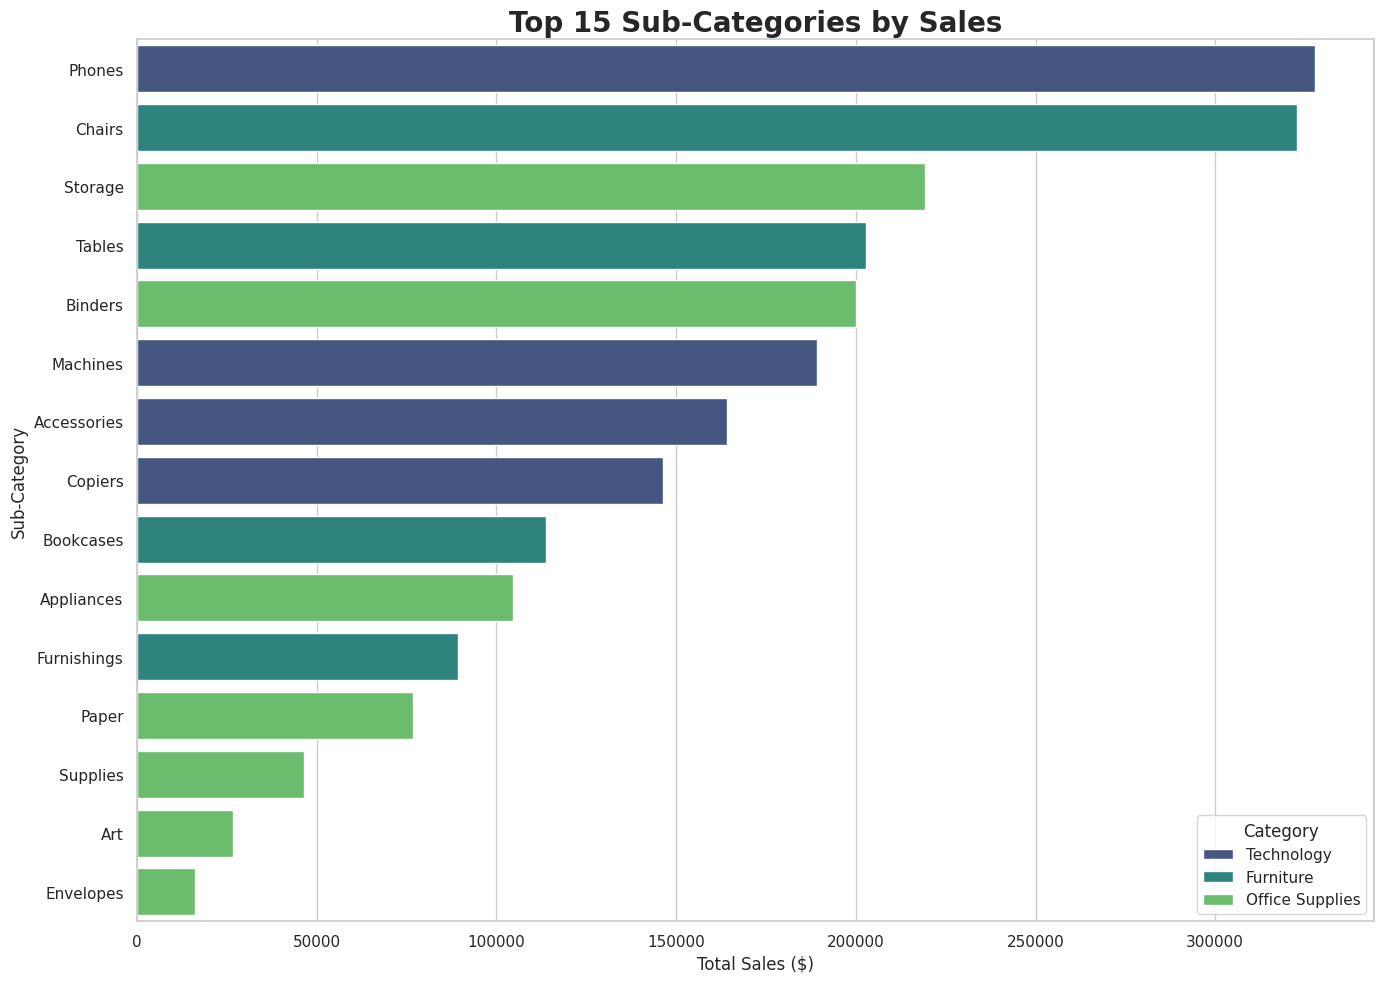


2. PRODUCT PERFORMANCE RANKING
-----------------------------------
Top 20 Products by Total Sales:
Product ID       Product Name                                                               
TEC-CO-10004722  Canon imageCLASS 2200 Advanced Copier                                          61599.8240
OFF-BI-10003527  Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.3840
TEC-MA-10002412  Cisco TelePresence System EX90 Videoconferencing Unit                          22638.4800
FUR-CH-10002024  HON 5400 Series Task Chairs for Big and Tall                                   21870.5760
OFF-BI-10001359  GBC DocuBind TL300 Electric Binding System                                     19823.4790
OFF-BI-10000545  GBC Ibimaster 500 Manual ProClick Binding System                               19024.5000
TEC-CO-10001449  Hewlett Packard LaserJet 3310 Copier                                           18839.6860
TEC-MA-10001127  HP Designjet T520 Inkjet Large Format Pri

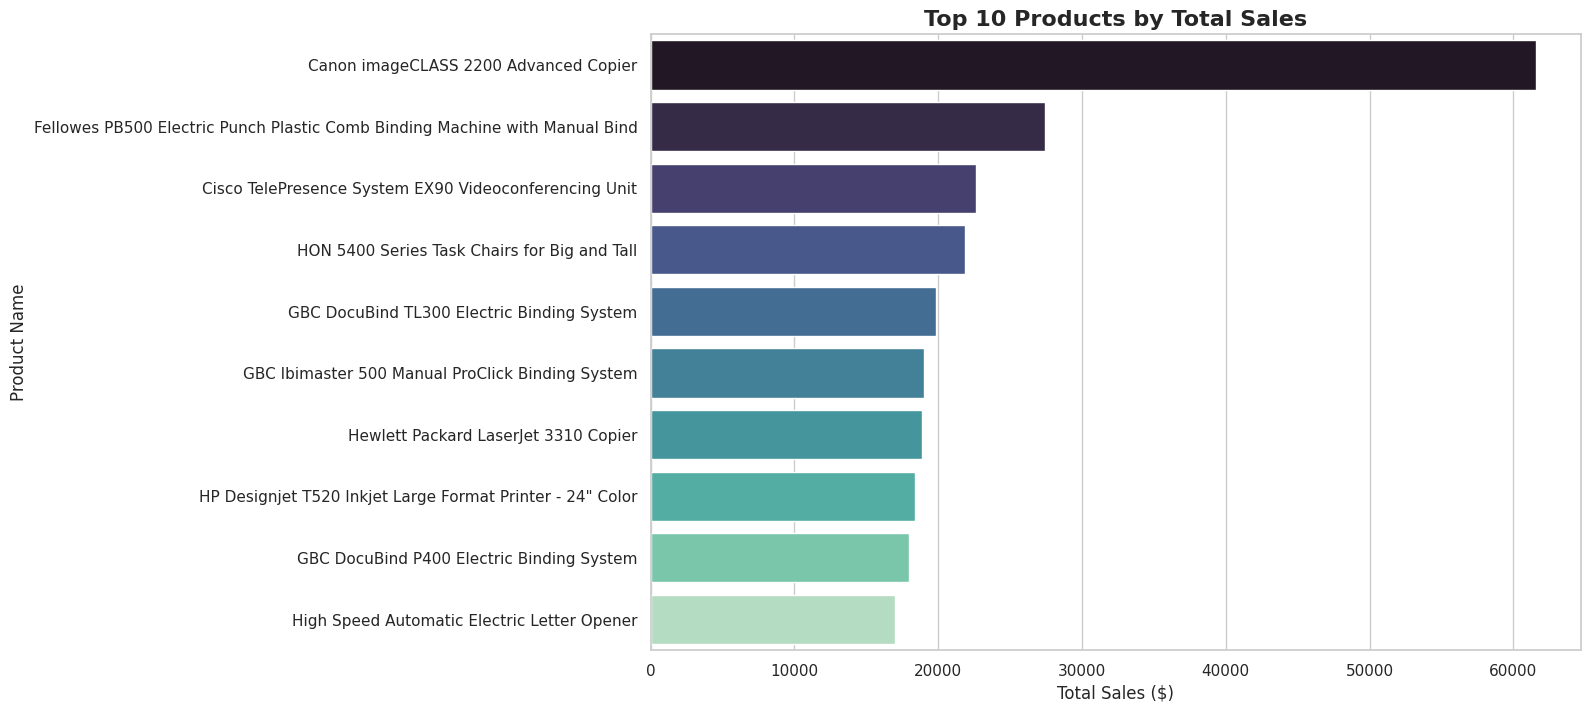


3. CATEGORY-WISE CONTRIBUTION
--------------------------------------------------
Percentage Distribution by Segment:
Segment          Consumer  Corporate  Home Office
Category                                         
Furniture            53.2       30.2         16.6
Office Supplies      50.9       31.8         17.3
Technology           48.5       29.5         22.0



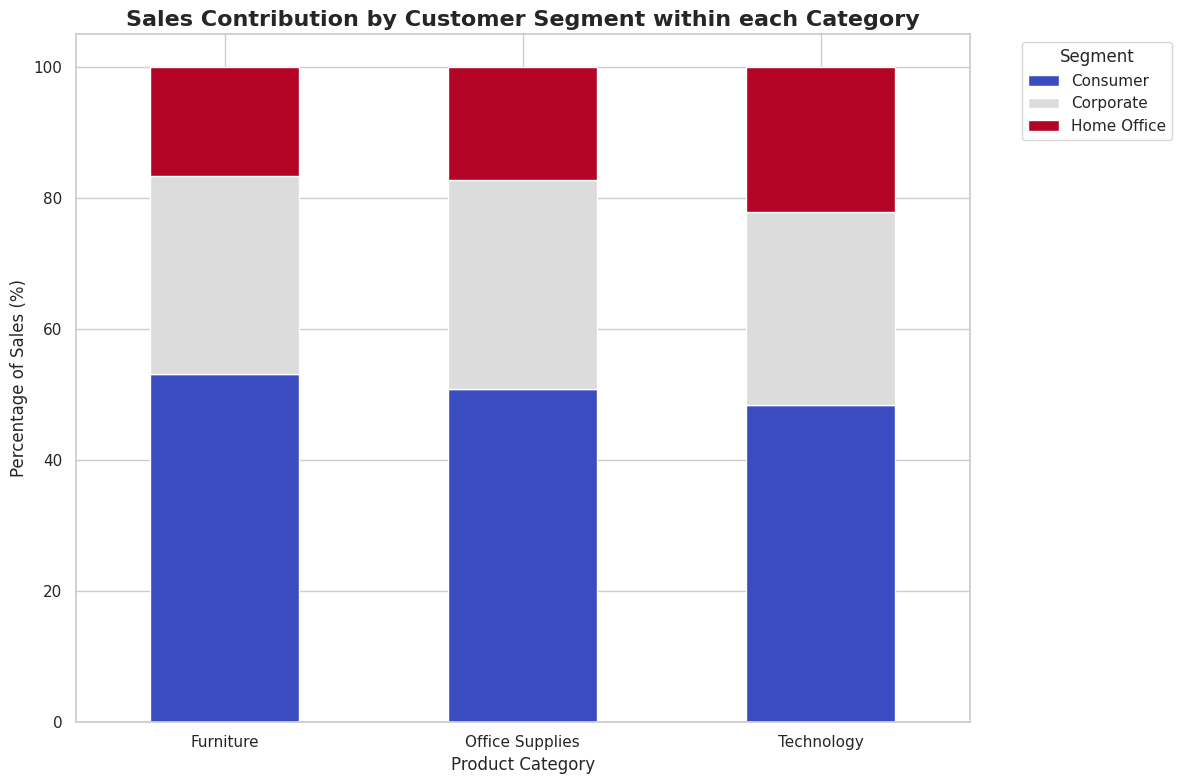


4. PRODUCT PORTFOLIO ANALYSIS
-----------------------------------
Product Portfolio Distribution:
Portfolio_Category
Average Performers    1199
Cash Cows              275
Star Products          191
Dogs                   128
Question Marks          68
Name: count, dtype: int64



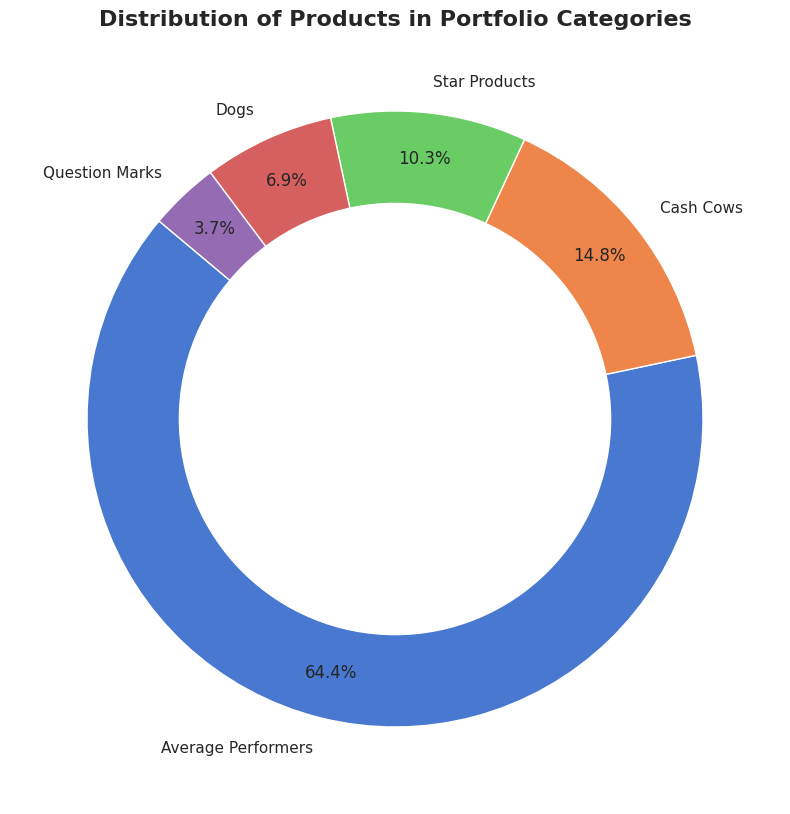


STAR PRODUCTS (High Sales + High Volume):
                     Sales  Order_Count Portfolio_Category
Product ID                                                
OFF-BI-10003527  27453.384           10      Star Products
FUR-CH-10002024  21870.576            8      Star Products
OFF-BI-10001359  19823.479           11      Star Products
OFF-BI-10000545  19024.500            9      Star Products
TEC-CO-10001449  18839.686            8      Star Products

CASH COWS (High Sales + Low Volume):
                     Sales  Order_Count Portfolio_Category
Product ID                                                
TEC-CO-10004722  61599.824            5          Cash Cows
TEC-MA-10002412  22638.480            1          Cash Cows
TEC-MA-10001127  18374.895            3          Cash Cows
OFF-BI-10004995  17965.068            6          Cash Cows
OFF-SU-10000151  17030.312            3          Cash Cows



In [8]:

sns.set_theme(style="whitegrid")

print("=== PRODUCT ANALYSIS ===\n")

print("1. BEST-SELLING CATEGORIES & SUB-CATEGORIES")
print("-" * 50)

category_stats = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print("Category Performance Summary (by Total Sales):")
print(category_stats)
print()

subcategory_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().sort_values(ascending=False)
print("Top 15 Sub-categories by Total Sales:")
print(subcategory_sales.head(15))
print()

plt.figure(figsize=(14, 10))
top_subcategories = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().nlargest(15).reset_index()
sns.barplot(data=top_subcategories, x='Sales', y='Sub-Category', hue='Category', dodge=False, palette='viridis')
plt.title('Top 15 Sub-Categories by Sales', fontsize=20, fontweight='bold')
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Sub-Category', fontsize=12)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

print("\n2. PRODUCT PERFORMANCE RANKING")
print("-" * 35)

product_performance = df.groupby(['Product ID', 'Product Name'])['Sales'].sum().sort_values(ascending=False)
print("Top 20 Products by Total Sales:")
print(product_performance.head(20))
print()

plt.figure(figsize=(12, 8))
top_10_products = product_performance.head(10)
sns.barplot(x=top_10_products.values, y=[name for pid, name in top_10_products.index], palette='mako', orient='h')
plt.title('Top 10 Products by Total Sales', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.show()

print("\n3. CATEGORY-WISE CONTRIBUTION")
print("-" * 50)

category_segment_pct = pd.crosstab(df['Category'], df['Segment'], values=df['Sales'], aggfunc='sum', normalize='index') * 100
print("Percentage Distribution by Segment:")
print(category_segment_pct.round(1))
print()

category_segment_pct.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')
plt.title('Sales Contribution by Customer Segment within each Category', fontsize=16, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Percentage of Sales (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\n4. PRODUCT PORTFOLIO ANALYSIS")
print("-" * 35)

product_sales = df.groupby('Product ID')['Sales'].sum()
product_volume = df.groupby('Product ID').size()

sales_q75 = product_sales.quantile(0.75)
volume_q75 = product_volume.quantile(0.75)
sales_q25 = product_sales.quantile(0.25)
volume_q25 = product_volume.quantile(0.25)

def categorize_product(sales, volume):
    if sales >= sales_q75 and volume >= volume_q75: return "Star Products"
    elif sales >= sales_q75 and volume < volume_q75: return "Cash Cows"
    elif sales < sales_q25 and volume >= volume_q75: return "Question Marks"
    elif sales < sales_q25 and volume < volume_q25: return "Dogs"
    else: return "Average Performers"

portfolio_analysis = pd.DataFrame({'Sales': product_sales, 'Order_Count': product_volume})
portfolio_analysis['Portfolio_Category'] = portfolio_analysis.apply(lambda row: categorize_product(row['Sales'], row['Order_Count']), axis=1)

portfolio_dist = portfolio_analysis['Portfolio_Category'].value_counts()
print("Product Portfolio Distribution:")
print(portfolio_dist)
print()

plt.figure(figsize=(10, 10))
colors = sns.color_palette('muted')[0:len(portfolio_dist)]
plt.pie(portfolio_dist, labels=portfolio_dist.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=colors)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribution of Products in Portfolio Categories', fontsize=16, fontweight='bold')
plt.show()

plt.figure(figsize=(14, 9))
sns.scatterplot(
    data=portfolio_analysis, x='Order_Count', y='Sales', hue='Portfolio_Category',
    size='Sales', sizes=(50, 1500), alpha=0.7, palette='viridis_r', style='Portfolio_Category',
    hue_order=['Star Products', 'Cash Cows', 'Question Marks', 'Dogs', 'Average Performers']
)
plt.axhline(sales_q75, color='grey', linestyle='--', lw=1.5)
plt.axvline(volume_q75, color='grey', linestyle='--', lw=1.5)
plt.text(volume_q75, plt.ylim()[1], '  Stars', va='top', ha='left', fontsize=14, weight='bold')
plt.text(plt.xlim()[0], sales_q75, 'Cash Cows', va='bottom', ha='left', fontsize=14, weight='bold')
plt.text(volume_q75, plt.ylim()[0], '  Question Marks', va='bottom', ha='left', fontsize=14, weight='bold')
plt.text(plt.xlim()[0], plt.ylim()[0], 'Dogs', va='bottom', ha='left', fontsize=14, weight='bold')
plt.xscale('log')
plt.yscale('log')
plt.title('Product Portfolio Analysis (BCG Matrix)', fontsize=20, fontweight='bold')
plt.xlabel('Number of Orders (Volume) - Log Scale', fontsize=12)
plt.ylabel('Total Sales ($) - Log Scale', fontsize=12)
plt.legend(title='Portfolio Category')
plt.show()

print("\nSTAR PRODUCTS (High Sales + High Volume):")
star_products = portfolio_analysis[portfolio_analysis['Portfolio_Category'] == 'Star Products'].sort_values('Sales', ascending=False)
print(star_products.head())
print()

print("CASH COWS (High Sales + Low Volume):")
cash_cows = portfolio_analysis[portfolio_analysis['Portfolio_Category'] == 'Cash Cows'].sort_values('Sales', ascending=False)
print(cash_cows.head())
print()


=== SHIPPING MODE PREFERENCES BY SEGMENT ===

Percentage distribution:
Ship Mode    First Class  Same Day  Second Class  Standard Class
Segment                                                         
Consumer            14.8       6.1          19.7            59.4
Corporate           15.8       3.9          19.9            60.3
Home Office         15.9       6.4          17.8            59.9

Key Insights:
• Consumer: Prefers 'Standard Class' (59.4%)
• Corporate: Prefers 'Standard Class' (60.3%)
• Home Office: Prefers 'Standard Class' (59.9%)

=== ORDER PROCESSING TIME ANALYSIS ===

Processing time statistics by shipping mode:
                mean  median   std
Ship Mode                         
First Class     2.18     2.0  0.77
Same Day        0.04     0.0  0.21
Second Class    3.25     3.0  1.19
Standard Class  5.01     5.0  1.01

Overall average processing time: 4.0 days
Overall median processing time: 4.0 days

=== REGIONAL SHIPPING PATTERNS ===

Shipping mode distribution by reg

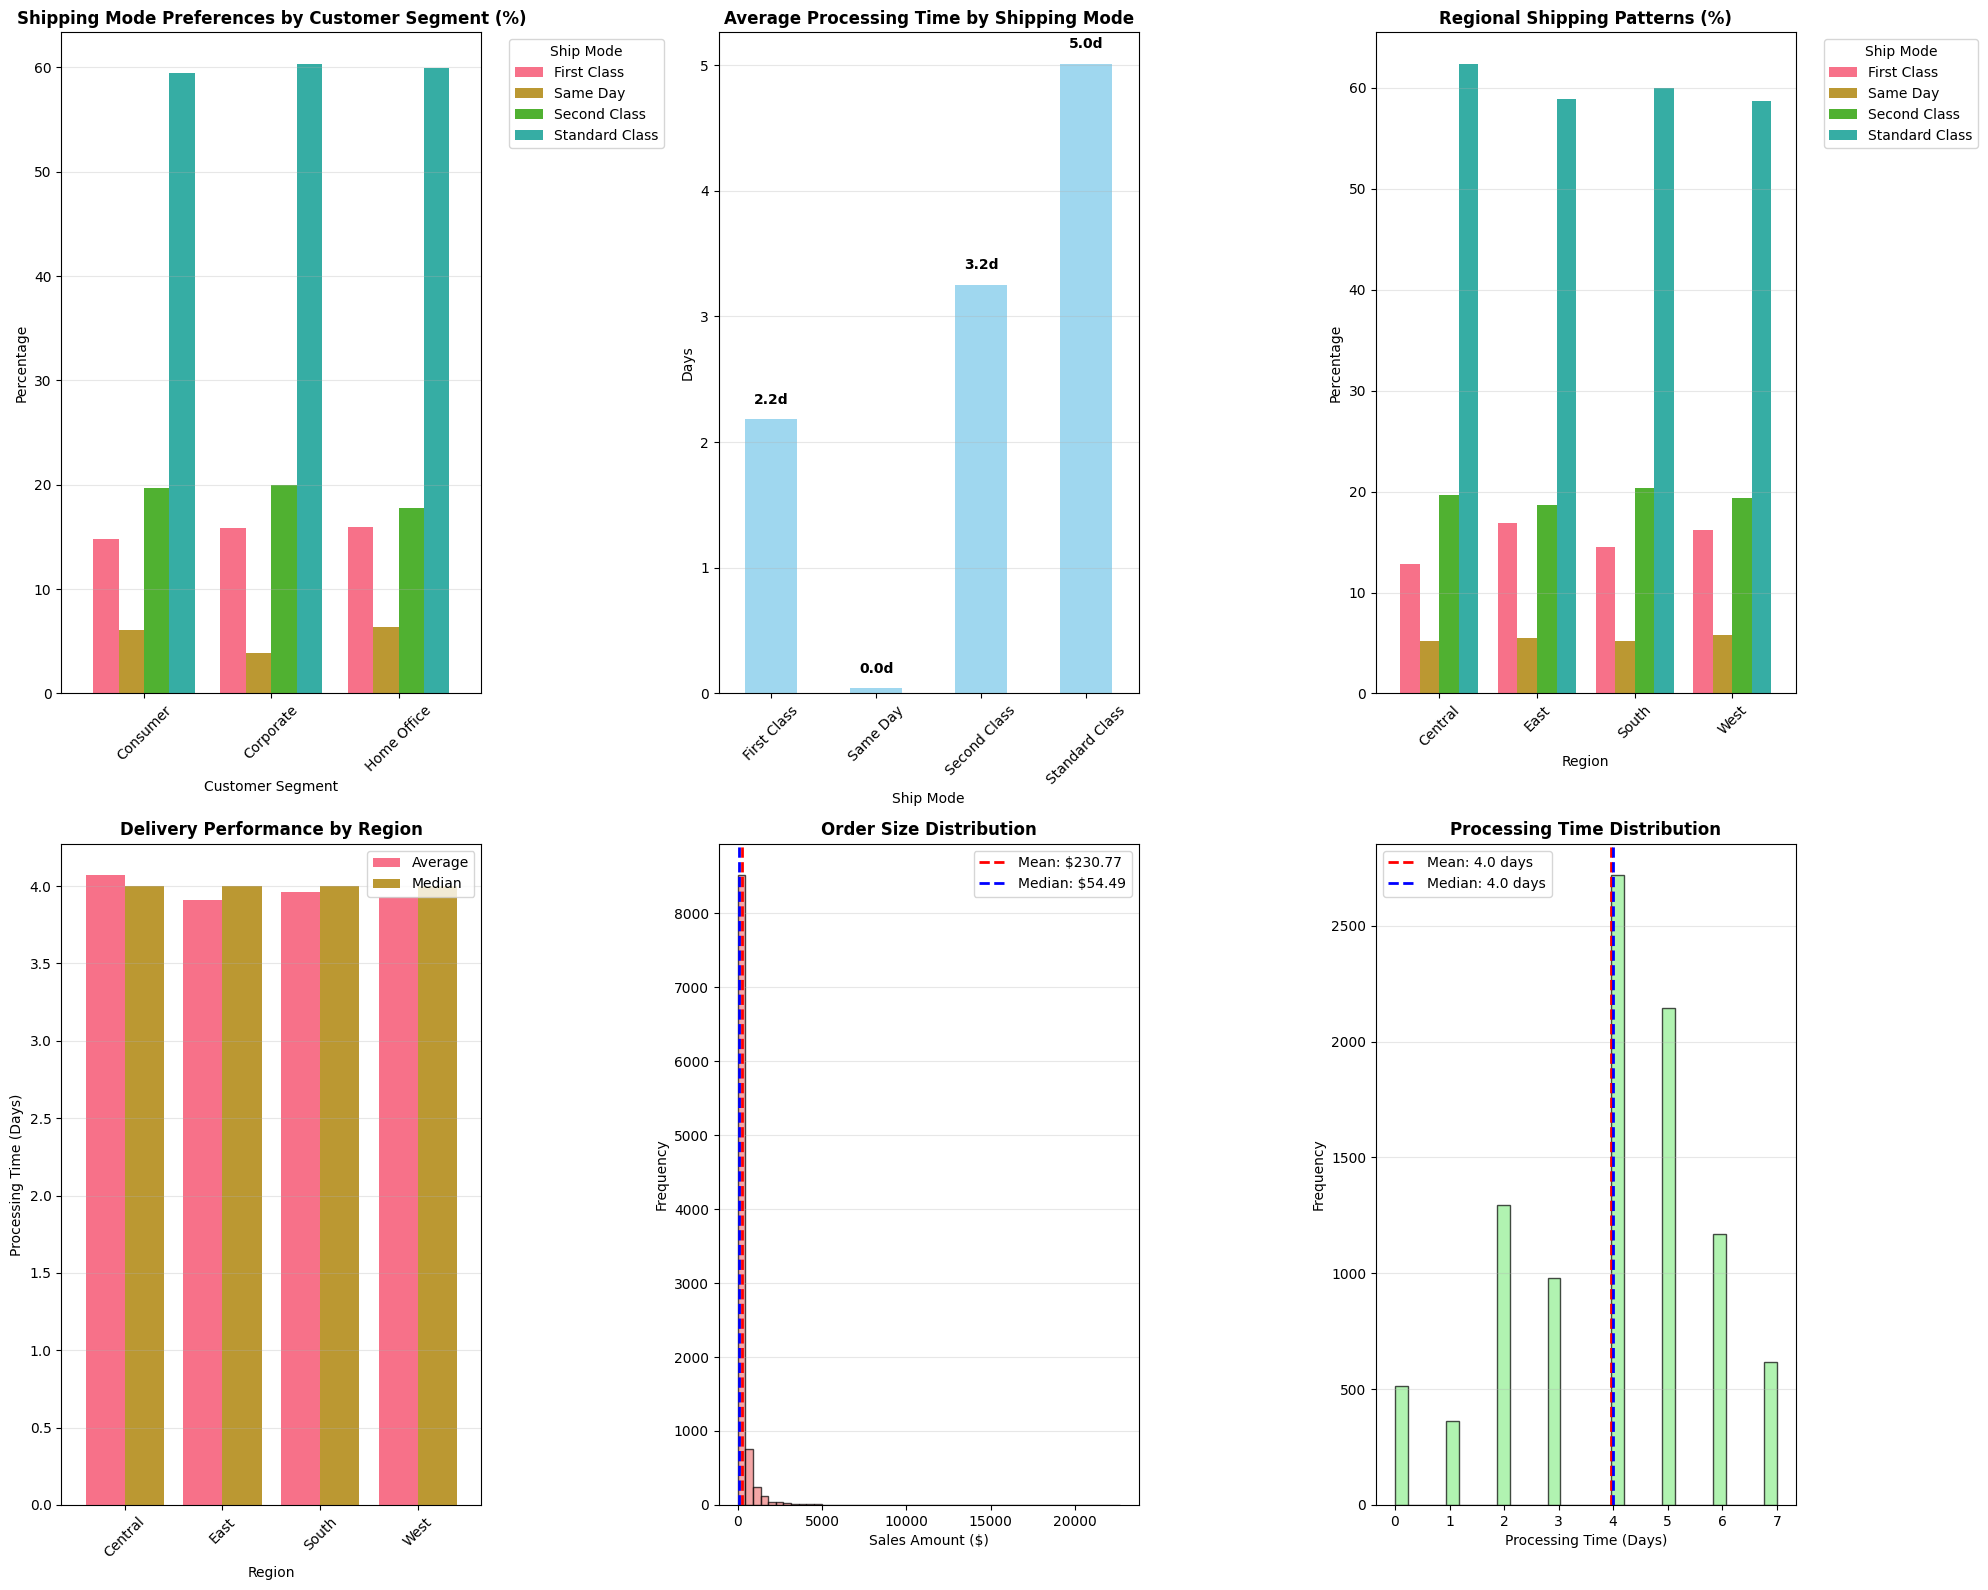


ADDITIONAL OPERATIONAL INSIGHTS

=== PROCESSING TIME BY CUSTOMER SEGMENT ===
             mean  median  count
Segment                         
Consumer     3.94     4.0   5101
Corporate    4.02     4.0   2953
Home Office  3.92     4.0   1746

=== FAST DELIVERY ANALYSIS ===
Same-day delivery orders: 514 (5.2%)
Next-day delivery orders: 363 (3.7%)

Orders with >7 days processing: 0 (0.0%)

=== ORDER SIZE vs PROCESSING TIME ===
Correlation coefficient: -0.006
Very weak correlation - order size doesn't significantly affect processing time


In [9]:
# ==============================================================================
# OPERATIONAL INSIGHTS ANALYSIS
# ==============================================================================

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df['Processing Time'] = (df['Ship Date'] - df['Order Date']).dt.days

plt.style.use('default')
sns.set_palette("husl")
fig = plt.figure(figsize=(20, 16))

plt.subplot(2, 3, 1)
segment_shipping = pd.crosstab(df['Segment'], df['Ship Mode'], normalize='index') * 100
segment_shipping.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Shipping Mode Preferences by Customer Segment (%)', fontsize=12, fontweight='bold')
plt.xlabel('Customer Segment')
plt.ylabel('Percentage')
plt.legend(title='Ship Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

print("=== SHIPPING MODE PREFERENCES BY SEGMENT ===")
print("\nPercentage distribution:")
print(segment_shipping.round(1))
print("\nKey Insights:")
for segment in segment_shipping.index:
    most_preferred = segment_shipping.loc[segment].idxmax()
    percentage = segment_shipping.loc[segment].max()
    print(f"• {segment}: Prefers '{most_preferred}' ({percentage:.1f}%)")


plt.subplot(2, 3, 2)
processing_stats = df.groupby('Ship Mode')['Processing Time'].agg(['mean', 'median', 'std']).round(2)
processing_stats['mean'].plot(kind='bar', ax=plt.gca(), color='skyblue', alpha=0.8)
plt.title('Average Processing Time by Shipping Mode', fontsize=12, fontweight='bold')
plt.xlabel('Ship Mode')
plt.ylabel('Days')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(processing_stats['mean']):
    plt.text(i, v + 0.1, f'{v:.1f}d', ha='center', va='bottom', fontweight='bold')

print("\n=== ORDER PROCESSING TIME ANALYSIS ===")
print("\nProcessing time statistics by shipping mode:")
print(processing_stats)
print(f"\nOverall average processing time: {df['Processing Time'].mean():.1f} days")
print(f"Overall median processing time: {df['Processing Time'].median():.1f} days")


plt.subplot(2, 3, 3)
regional_shipping = pd.crosstab(df['Region'], df['Ship Mode'], normalize='index') * 100
regional_shipping.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Regional Shipping Patterns (%)', fontsize=12, fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.legend(title='Ship Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

print("\n=== REGIONAL SHIPPING PATTERNS ===")
print("\nShipping mode distribution by region:")
print(regional_shipping.round(1))


plt.subplot(2, 3, 4)
regional_performance = df.groupby('Region')['Processing Time'].agg(['mean', 'median']).round(2)
regional_performance.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Delivery Performance by Region', fontsize=12, fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Processing Time (Days)')
plt.legend(['Average', 'Median'])
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

print("\n=== DELIVERY PERFORMANCE BY REGION ===")
print("\nProcessing time by region:")
print(regional_performance)
fastest_region = regional_performance['mean'].idxmin()
slowest_region = regional_performance['mean'].idxmax()
print(f"\nFastest delivery region: {fastest_region} ({regional_performance.loc[fastest_region, 'mean']:.1f} days avg)")
print(f"Slowest delivery region: {slowest_region} ({regional_performance.loc[slowest_region, 'mean']:.1f} days avg)")


plt.subplot(2, 3, 5)
plt.hist(df['Sales'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Order Size Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Sales Amount ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)

sales_stats = df['Sales'].describe()
plt.axvline(sales_stats['mean'], color='red', linestyle='--', linewidth=2, label=f'Mean: ${sales_stats["mean"]:.2f}')
plt.axvline(sales_stats['50%'], color='blue', linestyle='--', linewidth=2, label=f'Median: ${sales_stats["50%"]:.2f}')
plt.legend()

print("\n=== ORDER SIZE DISTRIBUTION ANALYSIS ===")
print("\nSales statistics:")
print(sales_stats.round(2))


df['Order Size Category'] = pd.cut(df['Sales'], 
                                   bins=[0, 100, 500, 1000, 5000, float('inf')], 
                                   labels=['Small (<$100)', 'Medium ($100-500)', 'Large ($500-1K)', 'Very Large ($1K-5K)', 'Enterprise (>$5K)'])

size_distribution = df['Order Size Category'].value_counts()
print(f"\nOrder size categories:")
for category, count in size_distribution.items():
    percentage = (count / len(df)) * 100
    print(f"• {category}: {count:,} orders ({percentage:.1f}%)")


plt.subplot(2, 3, 6)
plt.hist(df['Processing Time'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Processing Time Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Processing Time (Days)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)

plt.axvline(df['Processing Time'].mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {df["Processing Time"].mean():.1f} days')
plt.axvline(df['Processing Time'].median(), color='blue', linestyle='--', linewidth=2, 
           label=f'Median: {df["Processing Time"].median():.1f} days')
plt.legend()

plt.tight_layout()
plt.show()


print("\n" + "="*60)
print("ADDITIONAL OPERATIONAL INSIGHTS")
print("="*60)

print("\n=== PROCESSING TIME BY CUSTOMER SEGMENT ===")
segment_processing = df.groupby('Segment')['Processing Time'].agg(['mean', 'median', 'count']).round(2)
print(segment_processing)

same_day_orders = df[df['Processing Time'] == 0].shape[0]
next_day_orders = df[df['Processing Time'] == 1].shape[0]
print(f"\n=== FAST DELIVERY ANALYSIS ===")
print(f"Same-day delivery orders: {same_day_orders:,} ({same_day_orders/len(df)*100:.1f}%)")
print(f"Next-day delivery orders: {next_day_orders:,} ({next_day_orders/len(df)*100:.1f}%)")

long_processing = df[df['Processing Time'] > 7]
print(f"\nOrders with >7 days processing: {len(long_processing):,} ({len(long_processing)/len(df)*100:.1f}%)")

if len(long_processing) > 0:
    print("Ship modes for long processing orders:")
    print(long_processing['Ship Mode'].value_counts())

correlation = df['Sales'].corr(df['Processing Time'])
print(f"\n=== ORDER SIZE vs PROCESSING TIME ===")
print(f"Correlation coefficient: {correlation:.3f}")
if abs(correlation) < 0.1:
    print("Very weak correlation - order size doesn't significantly affect processing time")
elif abs(correlation) < 0.3:
    print("Weak correlation between order size and processing time")
elif abs(correlation) < 0.7:
    print("Moderate correlation between order size and processing time")
else:
    print("Strong correlation between order size and processing time")


=== TIME-BASED ANALYSIS OVERVIEW ===
Date Range: 03/01/2015 to 30/12/2018
Total Analysis Period: 1457 days
Years Covered: [np.int32(2015), np.int32(2016), np.int32(2017), np.int32(2018)]

=== SEASONAL SALES PATTERNS ===

Monthly Sales Performance:
            Total_Sales  Avg_Order_Value  Total_Orders  Unique_Customers
Month_Name                                                              
January        94291.63           257.63           366               156
February       59371.12           199.90           297               145
March         197573.59           290.55           680               284
April         136283.00           207.43           657               276
May           154086.72           212.53           725               298
June          145837.52           211.05           691               285
July          145535.69           208.80           697               275
August        157315.93           227.01           693               276
September     300103.4

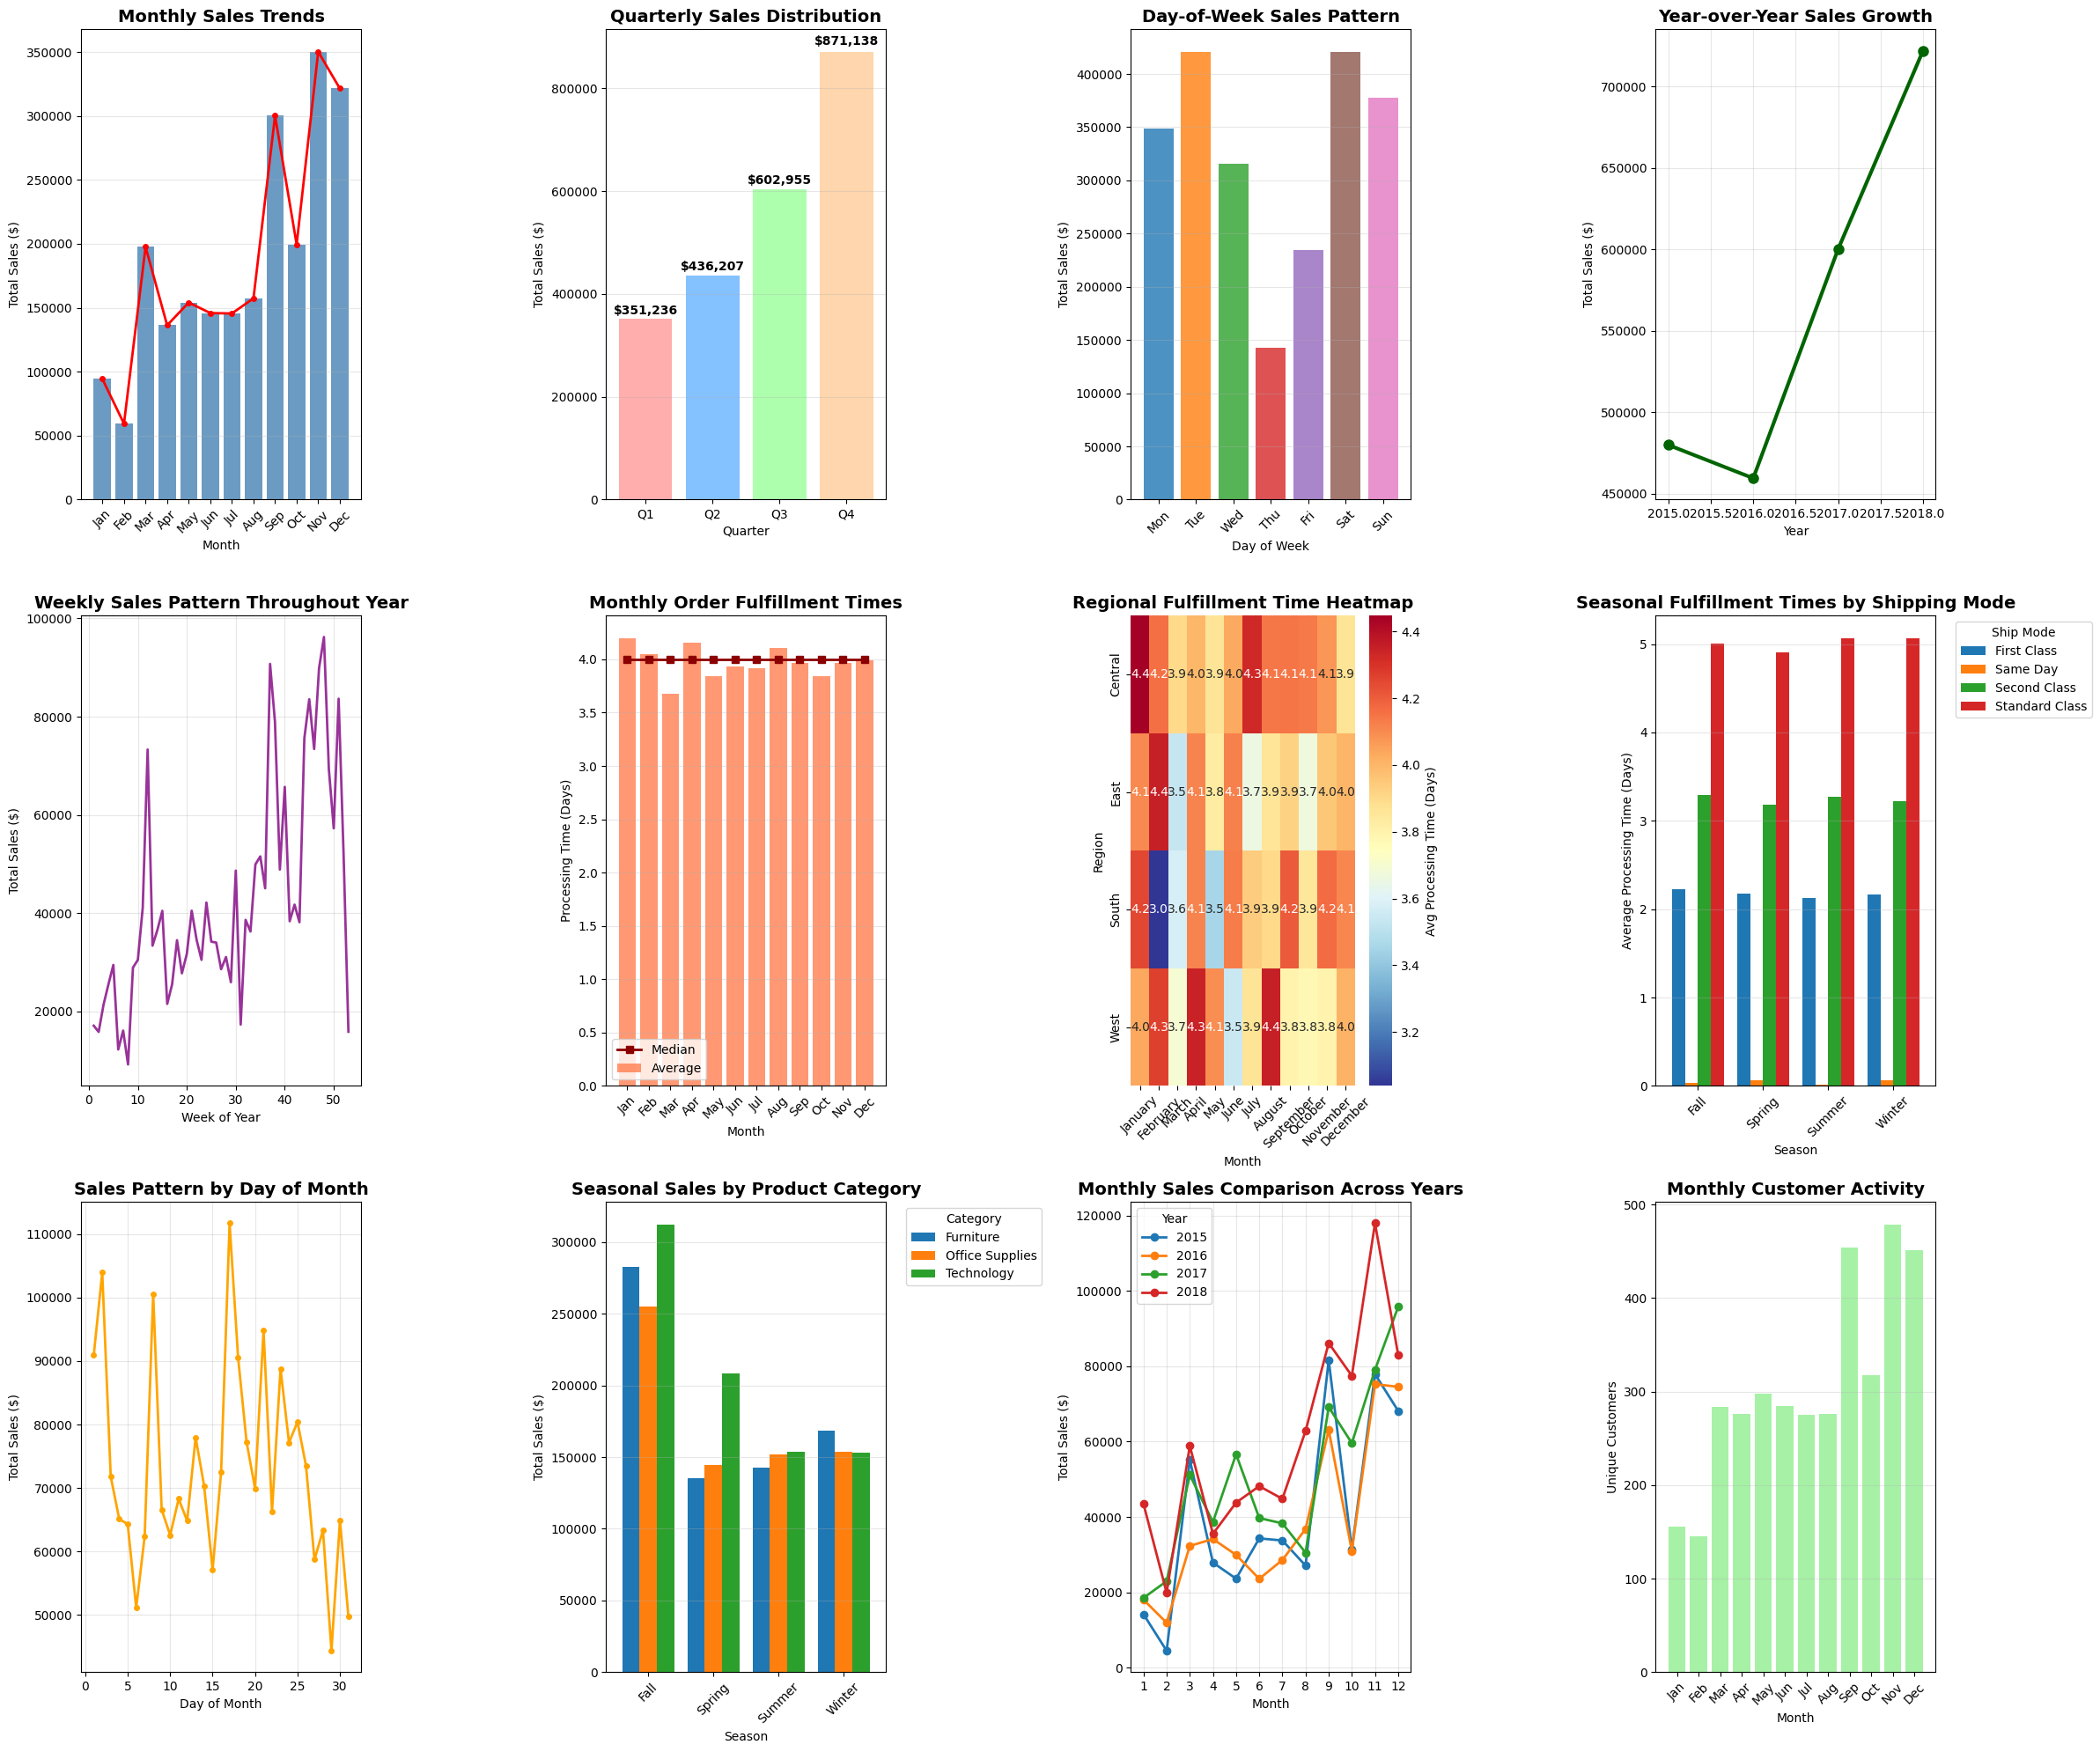


COMPREHENSIVE TIME-BASED INSIGHTS

=== SALES VELOCITY ANALYSIS ===
Daily Average Sales: $1,552.19
Monthly Average Sales: $47,115.35

=== SEASONALITY STRENGTH ===
Monthly Coefficient of Variation: 48.1%
Daily Coefficient of Variation: 31.7%
High seasonal variation detected in monthly patterns

=== FULFILLMENT PERFORMANCE SUMMARY ===
Overall Average Fulfillment Time: 4.0 days

TIME-BASED RECOMMENDATIONS
1. Plan inventory and staffing around identified peak months and quarters
2. Implement targeted marketing campaigns during low-sales months
3. Optimize fulfillment processes for peak seasons to maintain service levels
4. Consider day-of-week patterns for promotional timing and staff scheduling
5. Address regional fulfillment disparities during peak periods
6. Leverage seasonal product preferences for category-specific campaigns
7. Monitor and improve fulfillment times during historically slower months
8. Develop weekend sales strategies if weekday performance is significantly better
9. P

In [10]:


df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df['Processing Time'] = (df['Ship Date'] - df['Order Date']).dt.days

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.month_name()
df['Quarter'] = df['Order Date'].dt.quarter
df['Day_of_Week'] = df['Order Date'].dt.dayofweek
df['Day_Name'] = df['Order Date'].dt.day_name()
df['Week_of_Year'] = df['Order Date'].dt.isocalendar().week
df['Day_of_Month'] = df['Order Date'].dt.day

plt.style.use('default')
sns.set_palette("tab10")
fig = plt.figure(figsize=(24, 20))

print("=== TIME-BASED ANALYSIS OVERVIEW ===")
print(f"Date Range: {df['Order Date'].min().strftime('%d/%m/%Y')} to {df['Order Date'].max().strftime('%d/%m/%Y')}")
print(f"Total Analysis Period: {(df['Order Date'].max() - df['Order Date'].min()).days} days")
print(f"Years Covered: {sorted(df['Year'].unique())}")


print("\n=== SEASONAL SALES PATTERNS ===")

# Monthly sales aggregation
monthly_sales = df.groupby('Month_Name').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Customer ID': 'nunique'
}).round(2)
monthly_sales.columns = ['Total_Sales', 'Avg_Order_Value', 'Total_Orders', 'Unique_Customers']

# Reorder by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales = monthly_sales.reindex(month_order)

print("\nMonthly Sales Performance:")
print(monthly_sales)

plt.subplot(3, 4, 1)
bars = plt.bar(range(12), monthly_sales['Total_Sales'], color='steelblue', alpha=0.8)
plt.title('Monthly Sales Trends', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(range(12), [month[:3] for month in month_order], rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.plot(range(12), monthly_sales['Total_Sales'], color='red', marker='o', linewidth=2, markersize=4)

peak_month = monthly_sales['Total_Sales'].idxmax()
low_month = monthly_sales['Total_Sales'].idxmin()
print(f"\nPeak Sales Month: {peak_month} (${monthly_sales.loc[peak_month, 'Total_Sales']:,.2f})")
print(f"Lowest Sales Month: {low_month} (${monthly_sales.loc[low_month, 'Total_Sales']:,.2f})")


print("\n=== QUARTERLY ANALYSIS ===")

quarterly_sales = df.groupby('Quarter').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Customer ID': 'nunique'
}).round(2)
quarterly_sales.columns = ['Total_Sales', 'Avg_Order_Value', 'Total_Orders', 'Unique_Customers']

print("Quarterly Performance:")
print(quarterly_sales)

plt.subplot(3, 4, 2)
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
bars = plt.bar(quarters, quarterly_sales['Total_Sales'], color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'], alpha=0.8)
plt.title('Quarterly Sales Distribution', fontsize=14, fontweight='bold')  # Fixed: fontSize -> fontsize
plt.xlabel('Quarter')
plt.ylabel('Total Sales ($)')
plt.grid(axis='y', alpha=0.3)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'${height:,.0f}', ha='center', va='bottom', fontweight='bold')

best_quarter = quarterly_sales['Total_Sales'].idxmax()
print(f"\nBest Performing Quarter: Q{best_quarter} (${quarterly_sales.loc[best_quarter, 'Total_Sales']:,.2f})")


print("\n=== DAY-OF-WEEK ANALYSIS ===")

daily_sales = df.groupby('Day_Name').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Customer ID': 'nunique'
}).round(2)
daily_sales.columns = ['Total_Sales', 'Avg_Order_Value', 'Total_Orders', 'Unique_Customers']

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = daily_sales.reindex(day_order)

print("Daily Sales Performance:")
print(daily_sales)

plt.subplot(3, 4, 3)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
bars = plt.bar(range(7), daily_sales['Total_Sales'], color=colors, alpha=0.8)
plt.title('Day-of-Week Sales Pattern', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales ($)')
plt.xticks(range(7), [day[:3] for day in day_order], rotation=45)
plt.grid(axis='y', alpha=0.3)

best_day = daily_sales['Total_Sales'].idxmax()
worst_day = daily_sales['Total_Sales'].idxmin()
print(f"\nBest Sales Day: {best_day} (${daily_sales.loc[best_day, 'Total_Sales']:,.2f})")
print(f"Worst Sales Day: {worst_day} (${daily_sales.loc[worst_day, 'Total_Sales']:,.2f})")

weekend_sales = df[df['Day_Name'].isin(['Saturday', 'Sunday'])]['Sales'].sum()
weekday_sales = df[~df['Day_Name'].isin(['Saturday', 'Sunday'])]['Sales'].sum()
print(f"\nWeekend Sales: ${weekend_sales:,.2f} ({weekend_sales/(weekend_sales+weekday_sales)*100:.1f}%)")
print(f"Weekday Sales: ${weekday_sales:,.2f} ({weekday_sales/(weekend_sales+weekday_sales)*100:.1f}%)")


if len(df['Year'].unique()) > 1:
    print("\n=== YEARLY TRENDS ===")
    
    yearly_sales = df.groupby('Year').agg({
        'Sales': ['sum', 'mean', 'count'],
        'Customer ID': 'nunique'
    }).round(2)
    yearly_sales.columns = ['Total_Sales', 'Avg_Order_Value', 'Total_Orders', 'Unique_Customers']
    
    print("Yearly Performance:")
    print(yearly_sales)
    
    plt.subplot(3, 4, 4)
    years = yearly_sales.index
    plt.plot(years, yearly_sales['Total_Sales'], marker='o', linewidth=3, markersize=8, color='darkgreen')
    plt.title('Year-over-Year Sales Growth', fontsize=14, fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Total Sales ($)')
    plt.grid(True, alpha=0.3)
    
    # Calculate year-over-year growth
    if len(years) > 1:
        growth_rates = []
        for i in range(1, len(years)):
            growth = ((yearly_sales.iloc[i]['Total_Sales'] - yearly_sales.iloc[i-1]['Total_Sales']) / 
                     yearly_sales.iloc[i-1]['Total_Sales'] * 100)
            growth_rates.append(growth)
            print(f"Growth {years[i-1]} to {years[i]}: {growth:+.1f}%")


print("\n=== WEEKLY PATTERNS THROUGHOUT THE YEAR ===")

weekly_sales = df.groupby('Week_of_Year')['Sales'].sum()

plt.subplot(3, 4, 5)
plt.plot(weekly_sales.index, weekly_sales.values, linewidth=2, color='purple', alpha=0.8)
plt.title('Weekly Sales Pattern Throughout Year', fontsize=14, fontweight='bold')
plt.xlabel('Week of Year')
plt.ylabel('Total Sales ($)')
plt.grid(True, alpha=0.3)

peak_weeks = weekly_sales.nlargest(3)
print(f"Top 3 Sales Weeks:")
for week, sales in peak_weeks.items():
    print(f"• Week {week}: ${sales:,.2f}")


print("\n=== ORDER FULFILLMENT TIME ANALYSIS ===")

monthly_fulfillment = df.groupby('Month_Name')['Processing Time'].agg(['mean', 'median', 'std']).round(2)
monthly_fulfillment = monthly_fulfillment.reindex(month_order)

print("Monthly Fulfillment Times (days):")
print(monthly_fulfillment)

plt.subplot(3, 4, 6)
bars = plt.bar(range(12), monthly_fulfillment['mean'], color='coral', alpha=0.8, label='Average')
plt.plot(range(12), monthly_fulfillment['median'], color='darkred', marker='s', linewidth=2, label='Median')
plt.title('Monthly Order Fulfillment Times', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Processing Time (Days)')
plt.xticks(range(12), [month[:3] for month in month_order], rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)

fastest_month = monthly_fulfillment['mean'].idxmin()
slowest_month = monthly_fulfillment['mean'].idxmax()
print(f"\nFastest Fulfillment: {fastest_month} ({monthly_fulfillment.loc[fastest_month, 'mean']:.1f} days avg)")
print(f"Slowest Fulfillment: {slowest_month} ({monthly_fulfillment.loc[slowest_month, 'mean']:.1f} days avg)")


print("\n=== REGIONAL FULFILLMENT TIME ANALYSIS ===")

regional_monthly_fulfillment = df.groupby(['Region', 'Month_Name'])['Processing Time'].mean().unstack(fill_value=0)
regional_monthly_fulfillment = regional_monthly_fulfillment.reindex(columns=month_order)

plt.subplot(3, 4, 7)
sns.heatmap(regional_monthly_fulfillment, annot=True, fmt='.1f', cmap='RdYlBu_r', 
            cbar_kws={'label': 'Avg Processing Time (Days)'})
plt.title('Regional Fulfillment Time Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Region')
plt.xticks(rotation=45)

print("Regional Average Fulfillment Times by Month:")
print(regional_monthly_fulfillment.round(1))


plt.subplot(3, 4, 8)

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)

seasonal_ship_fulfillment = df.groupby(['Season', 'Ship Mode'])['Processing Time'].mean().unstack(fill_value=0)

seasonal_ship_fulfillment.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Seasonal Fulfillment Times by Shipping Mode', fontsize=14, fontweight='bold')
plt.xlabel('Season')
plt.ylabel('Average Processing Time (Days)')
plt.legend(title='Ship Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

print("\n=== SEASONAL FULFILLMENT ANALYSIS ===")
print("Average Fulfillment Times by Season and Ship Mode:")
print(seasonal_ship_fulfillment.round(2))


plt.subplot(3, 4, 9)

day_of_month_sales = df.groupby('Day_of_Month')['Sales'].sum()
plt.plot(day_of_month_sales.index, day_of_month_sales.values, marker='o', linewidth=2, markersize=4, color='orange')
plt.title('Sales Pattern by Day of Month', fontsize=14, fontweight='bold')
plt.xlabel('Day of Month')
plt.ylabel('Total Sales ($)')
plt.grid(True, alpha=0.3)

peak_day_of_month = day_of_month_sales.idxmax()
print(f"\n=== DAY-OF-MONTH ANALYSIS ===")
print(f"Peak Sales Day of Month: {peak_day_of_month} (${day_of_month_sales[peak_day_of_month]:,.2f})")

# Month-end vs Month-beginning analysis
month_start_sales = df[df['Day_of_Month'] <= 10]['Sales'].sum()
month_mid_sales = df[(df['Day_of_Month'] > 10) & (df['Day_of_Month'] <= 20)]['Sales'].sum()
month_end_sales = df[df['Day_of_Month'] > 20]['Sales'].sum()

print(f"Month Beginning (1-10): ${month_start_sales:,.2f}")
print(f"Month Middle (11-20): ${month_mid_sales:,.2f}")
print(f"Month End (21-31): ${month_end_sales:,.2f}")


plt.subplot(3, 4, 10)

seasonal_category = df.groupby(['Season', 'Category'])['Sales'].sum().unstack(fill_value=0)
seasonal_category.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Seasonal Sales by Product Category', fontsize=14, fontweight='bold')
plt.xlabel('Season')
plt.ylabel('Total Sales ($)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

print("\n=== SEASONAL PRODUCT PREFERENCES ===")
print("Sales by Season and Product Category:")
print(seasonal_category.round(0))


plt.subplot(3, 4, 11)

if len(df['Year'].unique()) > 1:
    monthly_yearly = df.groupby(['Year', 'Month'])['Sales'].sum().unstack(level=0, fill_value=0)
    monthly_yearly.plot(kind='line', ax=plt.gca(), marker='o', linewidth=2)
    plt.title('Monthly Sales Comparison Across Years', fontsize=14, fontweight='bold')
    plt.xlabel('Month')
    plt.ylabel('Total Sales ($)')
    plt.legend(title='Year')
    plt.xticks(range(1, 13))
    plt.grid(True, alpha=0.3)
else:
    monthly_metrics = df.groupby('Month').agg({'Sales': 'sum', 'Order ID': 'count'})
    
    ax1 = plt.gca()
    color = 'tab:blue'
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Total Sales ($)', color=color)
    ax1.plot(monthly_metrics.index, monthly_metrics['Sales'], color=color, marker='o', linewidth=2)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Order Count', color=color)
    ax2.plot(monthly_metrics.index, monthly_metrics['Order ID'], color=color, marker='s', linewidth=2)
    ax2.tick_params(axis='y', labelcolor=color)
    
    plt.title('Monthly Sales vs Order Count', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)


plt.subplot(3, 4, 12)

monthly_customers = df.groupby('Month_Name')['Customer ID'].nunique()
monthly_customers = monthly_customers.reindex(month_order)

bars = plt.bar(range(12), monthly_customers.values, color='lightgreen', alpha=0.8)
plt.title('Monthly Customer Activity', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Unique Customers')
plt.xticks(range(12), [month[:3] for month in month_order], rotation=45)
plt.grid(axis='y', alpha=0.3)

print(f"\n=== CUSTOMER ACTIVITY PATTERNS ===")
print("Monthly Unique Customer Count:")
for month, count in monthly_customers.items():
    print(f"• {month}: {count} customers")

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("COMPREHENSIVE TIME-BASED INSIGHTS")
print("="*80)

print("\n=== SALES VELOCITY ANALYSIS ===")
total_days = (df['Order Date'].max() - df['Order Date'].min()).days
daily_avg_sales = df['Sales'].sum() / total_days
monthly_avg_sales = df.groupby(['Year', 'Month'])['Sales'].sum().mean()

print(f"Daily Average Sales: ${daily_avg_sales:,.2f}")
print(f"Monthly Average Sales: ${monthly_avg_sales:,.2f}")

monthly_cv = (monthly_sales['Total_Sales'].std() / monthly_sales['Total_Sales'].mean()) * 100
daily_cv = (daily_sales['Total_Sales'].std() / daily_sales['Total_Sales'].mean()) * 100

print(f"\n=== SEASONALITY STRENGTH ===")
print(f"Monthly Coefficient of Variation: {monthly_cv:.1f}%")
print(f"Daily Coefficient of Variation: {daily_cv:.1f}%")

if monthly_cv > 20:
    print("High seasonal variation detected in monthly patterns")
elif monthly_cv > 10:
    print("Moderate seasonal variation in monthly patterns")
else:
    print("Low seasonal variation in monthly patterns")

print(f"\n=== FULFILLMENT PERFORMANCE SUMMARY ===")
overall_avg_fulfillment = df['Processing Time'].mean()
print(f"Overall Average Fulfillment Time: {overall_avg_fulfillment:.1f} days")

problematic_months = monthly_fulfillment[monthly_fulfillment['mean'] > overall_avg_fulfillment * 1.2]
if len(problematic_months) > 0:
    print("Months with slower than average fulfillment:")
    for month in problematic_months.index:
        print(f"• {month}: {monthly_fulfillment.loc[month, 'mean']:.1f} days")

print("\n" + "="*80)
print("TIME-BASED RECOMMENDATIONS")
print("="*80)
print("1. Plan inventory and staffing around identified peak months and quarters")
print("2. Implement targeted marketing campaigns during low-sales months")
print("3. Optimize fulfillment processes for peak seasons to maintain service levels")
print("4. Consider day-of-week patterns for promotional timing and staff scheduling")
print("5. Address regional fulfillment disparities during peak periods")
print("6. Leverage seasonal product preferences for category-specific campaigns")
print("7. Monitor and improve fulfillment times during historically slower months")
print("8. Develop weekend sales strategies if weekday performance is significantly better")
print("9. Plan capacity expansion based on multi-year growth trends")
print("10. Use month-end sales patterns for cash flow and inventory management")